___
# Project-05_Restaurant Food 
___

In [3]:
# importing project dependencies:

# compute dependency
import numpy as np
# dataframe dependency
import pandas as pd
# visualization dependencies
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.express as px
# stats dependency
from scipy import stats
# feature_engineering dependency
import feature_engine
# from scraping some data
import webbrowser

import re

import warnings
warnings.filterwarnings('ignore')

In [4]:
# importing the dataset.
train_df = pd.read_excel('Data_Train.xlsx')
test_df = pd.read_excel('Data_Test.xlsx')

In [5]:
train_df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [6]:
test_df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [7]:
# get the shape
train_df.shape,test_df.shape

((12690, 9), (4231, 8))

In [8]:
## getting info of the datatypes of the columns
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [9]:
# description
train_df.describe()

,RESTAURANT_ID,COST
count,12690.000000,12690.000000
mean,7759.134121,655.252246
std,4504.874150,627.003540
min,0.000000,20.000000
25%,3863.250000,300.000000
50%,7740.000000,500.000000
75%,11688.750000,800.000000
max,15573.000000,14000.000000


In [10]:
# test description
test_df.describe()

,RESTAURANT_ID
count,4231.000000
mean,7791.438431
std,4458.797621
min,3.000000
25%,3908.500000
50%,7798.000000
75%,11634.000000
max,15572.000000


In [11]:
df = train_df.append(test_df)

In [12]:
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0


In [13]:
df.tail()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes,NaN
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes,NaN
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes,NaN
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN,NaN
4230,QUICK BITES,2421,Mughlai,5pm – 1am (Mon-Sun),Bandra West,Perry Cross Road,3.7,63 votes,NaN


In [14]:
# check for the missing values in the datasets

In [15]:
train_df.isna().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [16]:
test_df.isna().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

In [17]:
## check for any high correlation in the dataset.

In [18]:
train_df.corr()

,RESTAURANT_ID,COST
RESTAURANT_ID,1.00000,0.04071
COST,0.04071,1.00000


In [19]:
test_df.corr()

,RESTAURANT_ID
RESTAURANT_ID,1.0


In [20]:
# let's seperate the numerical features and the categorical features and store their names in 2lists.

In [21]:
from feature_engine.missing_data_imputers import _find_categorical_variables,_find_numerical_variables

In [22]:
num_var = _find_numerical_variables(df)
cat_var = _find_categorical_variables(df)

In [23]:
num_var,len(num_var)

(['RESTAURANT_ID', 'COST'], 2)

In [24]:
cat_var,len(cat_var)

(['TITLE', 'CUISINES', 'TIME', 'CITY', 'LOCALITY', 'RATING', 'VOTES'], 7)

Infereneces:
    * There are 2 datasets, train and test differently.
    * Both of the sets have some missing values.
    * There are only 2 numerical features in the dataset.
    * The rest of the 7 features ae non numerical.
    * As there are only 2 numerical features, there is no issue with the correaltion to be seen.

## Univariate analysis and feature processing .

In [25]:
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0


In [26]:
# helper function 1:
# to get all the rows:

def show_all_rows(x):
    pd.set_option('display.max_rows',None)
    i = 0
    while i == 0:
        print(x)
        i = 1
    pd.reset_option('display.max_rows')

In [27]:
## TITLE

In [28]:
df.TITLE.value_counts()

QUICK BITES                     5634
CASUAL DINING                   4910
None                            1287
CAFÉ                             830
DESSERT PARLOR                   508
                                ... 
PUB,FINE DINING                    1
CASUAL DINING,DESSERT PARLOR       1
BAKERY,CONFECTIONERY               1
CAFÉ,FINE DINING                   1
DESSERT PARLOR,KIOSK               1
Name: TITLE, Length: 123, dtype: int64

In [29]:
df.TITLE.unique()

array(['CASUAL DINING', 'CASUAL DINING,BAR', 'QUICK BITES',
       'DESSERT PARLOR', 'CAFÉ', 'MICROBREWERY',
       'QUICK BITES,BEVERAGE SHOP', 'CASUAL DINING,IRANI CAFE',
       'BAKERY,QUICK BITES', 'None', 'BAR,CASUAL DINING', 'BAR', 'PUB',
       'BEVERAGE SHOP', 'FINE DINING', 'CAFÉ,QUICK BITES',
       'BEVERAGE SHOP,DESSERT PARLOR', 'SWEET SHOP,QUICK BITES',
       'DESSERT PARLOR,SWEET SHOP', 'BAKERY', 'BAKERY,DESSERT PARLOR',
       'BAR,LOUNGE', 'FOOD COURT', 'LOUNGE',
       'DESSERT PARLOR,BEVERAGE SHOP', 'LOUNGE,CASUAL DINING',
       'FOOD TRUCK', 'QUICK BITES,FOOD COURT', 'SWEET SHOP',
       'BEVERAGE SHOP,FOOD COURT', 'PUB,CASUAL DINING', 'MESS',
       'MICROBREWERY,CASUAL DINING', 'CASUAL DINING,SWEET SHOP', 'KIOSK',
       'QUICK BITES,KIOSK', 'CLUB', 'FINE DINING,BAR',
       'DESSERT PARLOR,QUICK BITES', 'FOOD COURT,QUICK BITES',
       'LOUNGE,CAFÉ', 'BAKERY,CONFECTIONERY', 'CASUAL DINING,CAFÉ',
       'DHABA', 'CAFÉ,DESSERT PARLOR', 'QUICK BITES,DESSERT PARLOR'

In [30]:
len(df.TITLE.unique())

123

* So ,we have somw messy data, let's perform categorical binning!

In [31]:
show_all_rows(df.TITLE.value_counts())

QUICK BITES                     5634
CASUAL DINING                   4910
None                            1287
CAFÉ                             830
DESSERT PARLOR                   508
CASUAL DINING,BAR                463
FINE DINING                      406
BAKERY                           392
BEVERAGE SHOP                    216
BAR,CASUAL DINING                175
LOUNGE                           136
BAKERY,QUICK BITES               126
BAR                              124
FOOD COURT                       110
KIOSK                             73
SWEET SHOP,QUICK BITES            70
MESS                              68
SWEET SHOP                        67
PUB                               67
CASUAL DINING,CAFÉ                65
DHABA                             61
BAKERY,DESSERT PARLOR             61
DESSERT PARLOR,QUICK BITES        57
QUICK BITES,SWEET SHOP            49
CAFÉ,CASUAL DINING                47
BEVERAGE SHOP,QUICK BITES         45
CAFÉ,BAKERY                       43
P

* We have to manually bin these TITLE values into bins.

<--- Casual Dining --->

In [32]:
dining_title = df[df.TITLE.str.contains('DINING')].TITLE.value_counts().index

In [33]:
dining_title

Index(['CASUAL DINING', 'CASUAL DINING,BAR', 'FINE DINING',
       'BAR,CASUAL DINING', 'CASUAL DINING,CAFÉ', 'CAFÉ,CASUAL DINING',
       'PUB,CASUAL DINING', 'MICROBREWERY,CASUAL DINING', 'FINE DINING,BAR',
       'LOUNGE,CASUAL DINING', 'CASUAL DINING,PUB', 'CASUAL DINING,LOUNGE',
       'FINE DINING,LOUNGE', 'CASUAL DINING,MICROBREWERY',
       'CASUAL DINING,BAKERY', 'CASUAL DINING,SWEET SHOP', 'BAR,FINE DINING',
       'QUICK BITES,CASUAL DINING', 'COCKTAIL BAR,CASUAL DINING',
       'CASUAL DINING,IRANI CAFE', 'FINE DINING,CAFÉ',
       'SWEET SHOP,CASUAL DINING', 'LOUNGE,FINE DINING', 'CLUB,CASUAL DINING',
       'CASUAL DINING,FOOD COURT', 'CASUAL DINING,CLUB', 'CAFÉ,FINE DINING',
       'CASUAL DINING,DESSERT PARLOR', 'CLUB,FINE DINING', 'PUB,FINE DINING',
       'BAKERY,CASUAL DINING', 'BEVERAGE SHOP,CASUAL DINING',
       'FINE DINING,MICROBREWERY'],
      dtype='object')

* Create a new caopy for preporcessing and model building and keep the original one for visualization.

In [34]:
df_cleaned = df.copy()

In [35]:
df_cleaned.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0


In [36]:
# mapper
df_cleaned.TITLE.replace(to_replace=dining_title,value='CASUAL DINING',inplace=True)

In [37]:
df_cleaned.TITLE.value_counts()

CASUAL DINING               6333
QUICK BITES                 5634
None                        1287
CAFÉ                         830
DESSERT PARLOR               508
                            ... 
BEVERAGE SHOP,FOOD COURT       1
MICROBREWERY,LOUNGE            1
BHOJANALYA                     1
BAR,MICROBREWERY               1
BAKERY,FOOD COURT              1
Name: TITLE, Length: 91, dtype: int64

<--- Quick bites --->

In [38]:
df_cleaned[df_cleaned.TITLE.str.contains('BITES')]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0
8,QUICK BITES,7062,"South Indian, North Indian",7am – 10:30pm (Mon-Sun),Bangalore,Bannerghatta Road,3.9,101 votes,300.0
9,QUICK BITES,10109,North Indian,"11am – 2pm, 4pm – 10:30pm (Mon-Sun)",Hyderabad,Dilsukhnagar,3.3,219 votes,200.0
11,"QUICK BITES,BEVERAGE SHOP",844,"Fast Food, Burger, Beverages","11am – 12:15AM (Mon, Tue, Wed, Thu, Fri, Sun)...",Bangalore,Indiranagar,4.0,274 votes,800.0
14,QUICK BITES,15024,Maharashtrian,"Closed (Mon),11am – 11pm (Tue-Sun)",Thane West,Majiwada,4.0,160 votes,300.0
...,...,...,...,...,...,...,...,...,...
4224,QUICK BITES,331,"Kerala, South Indian","12noon – 4pm, 7pm – 10:30pm (Mon-Sat),12noon –...",Bangalore,Indiranagar,3.8,410 votes,NaN
4225,QUICK BITES,1670,"North Indian, Mughlai, Chinese","6am – 12:30AM (Mon, Tue, Wed, Thu, Sat, Sun), ...",Mumbai,Grant Road,4.0,197 votes,NaN
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes,NaN
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN,NaN


In [39]:
quick_bites_title = df_cleaned[df_cleaned.TITLE.str.contains('BITES')].TITLE.value_counts().index

In [40]:
quick_bites_title

Index(['QUICK BITES', 'BAKERY,QUICK BITES', 'SWEET SHOP,QUICK BITES',
       'DESSERT PARLOR,QUICK BITES', 'QUICK BITES,SWEET SHOP',
       'BEVERAGE SHOP,QUICK BITES', 'QUICK BITES,DESSERT PARLOR',
       'CAFÉ,QUICK BITES', 'QUICK BITES,BAKERY', 'QUICK BITES,BEVERAGE SHOP',
       'FOOD COURT,QUICK BITES', 'QUICK BITES,FOOD COURT', 'QUICK BITES,CAFÉ',
       'QUICK BITES,KIOSK', 'KIOSK,QUICK BITES', 'MEAT SHOP,QUICK BITES',
       'QUICK BITES,FOOD TRUCK', 'QUICK BITES,MEAT SHOP',
       'CONFECTIONERY,QUICK BITES', 'QUICK BITES,BAR'],
      dtype='object')

In [41]:
len(quick_bites_title)

20

In [42]:
# mapper
df_cleaned.TITLE.replace(to_replace=quick_bites_title,value='QUICK BITES',inplace=True)

In [43]:
df_cleaned.TITLE.value_counts()

CASUAL DINING          6333
QUICK BITES            6139
None                   1287
CAFÉ                    830
DESSERT PARLOR          508
                       ... 
BAKERY,FOOD COURT         1
BAR,MICROBREWERY          1
KIOSK,FOOD COURT          1
MICROBREWERY,LOUNGE       1
IRANI CAFE,BAKERY         1
Name: TITLE, Length: 72, dtype: int64

<--- CAFE --->

In [44]:
df_cleaned[df_cleaned.TITLE.str.contains('CAF')]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
6,CAFÉ,4383,"Cafe, Chinese, Pizza, North Indian, Burger","12noon – 11:30pm (Mon, Tue, Thu, Fri, Sat, Sun...",Bangalore,Koramangala 6th Block,4.1,509 votes,600.0
24,CAFÉ,2389,"Cafe, Italian, Chinese",11am – 11pm (Mon-Sun),New Delhi,Dwarka,4.2,493 votes,700.0
31,CAFÉ,2802,"Cafe, Tea","8am – 11pm (Mon-Fri),8am – 7pm (Sat),Closed (Sun)",Gurgaon,DLF Cyber City,4.0,546 votes,500.0
32,CAFÉ,7836,"Cafe, Continental, European, American, Healthy...",10am – 12midnight (Mon-Sun),Andheri West,Versova,4.0,2228 votes,1200.0
37,CAFÉ,4455,"Cafe, Healthy Food",8:30am – 11pm (Mon-Sun),Bangalore,MG Road,4.3,69 votes,800.0
...,...,...,...,...,...,...,...,...,...
4127,CAFÉ,6653,"Cafe, Continental, Italian, Salad",11am – 11pm (Mon-Sun),New Delhi,Shahpur Jat,4.1,1114 votes,NaN
4176,CAFÉ,1499,"Cafe, Italian, Continental",11:30am – 11:30pm (Mon-Sun),Bangalore,Sahakara Nagar,3.9,241 votes,NaN
4183,CAFÉ,7007,"Cafe, North Indian",11am – 11pm (Mon-Sun),Noida,Sector 63,NEW,NaN,NaN
4187,CAFÉ,2561,Cafe,11am – 11pm (Mon-Sun),Bangalore,Jalahalli,3.9,104 votes,NaN


In [45]:
df_cleaned[df_cleaned.TITLE.str.contains('CAF')].TITLE.value_counts()

CAFÉ                   830
CAFÉ,BAKERY             43
CAFÉ,DESSERT PARLOR     38
CAFÉ,BAR                23
BAKERY,CAFÉ             18
DESSERT PARLOR,CAFÉ     12
BAR,CAFÉ                 4
CAFÉ,BEVERAGE SHOP       4
BEVERAGE SHOP,CAFÉ       4
LOUNGE,CAFÉ              2
PUB,CAFÉ                 2
CAFÉ,LOUNGE              2
CAFÉ,FOOD COURT          1
IRANI CAFE,BAKERY        1
Name: TITLE, dtype: int64

In [46]:
cafe_title = df_cleaned[df_cleaned.TITLE.str.contains('CAF')].TITLE.value_counts().index

In [47]:
cafe_title

Index(['CAFÉ', 'CAFÉ,BAKERY', 'CAFÉ,DESSERT PARLOR', 'CAFÉ,BAR', 'BAKERY,CAFÉ',
       'DESSERT PARLOR,CAFÉ', 'BAR,CAFÉ', 'CAFÉ,BEVERAGE SHOP',
       'BEVERAGE SHOP,CAFÉ', 'LOUNGE,CAFÉ', 'PUB,CAFÉ', 'CAFÉ,LOUNGE',
       'CAFÉ,FOOD COURT', 'IRANI CAFE,BAKERY'],
      dtype='object')

In [48]:
len(cafe_title)

14

In [49]:
# mapper
df_cleaned.TITLE.replace(to_replace=cafe_title,value='CAFE',inplace=True)

In [50]:
df_cleaned.TITLE.value_counts()

CASUAL DINING                   6333
QUICK BITES                     6139
None                            1287
CAFE                             984
DESSERT PARLOR                   508
BAKERY                           392
BEVERAGE SHOP                    216
LOUNGE                           136
BAR                              124
FOOD COURT                       110
KIOSK                             73
MESS                              68
SWEET SHOP                        67
PUB                               67
DHABA                             61
BAKERY,DESSERT PARLOR             61
FOOD TRUCK                        37
LOUNGE,BAR                        27
CLUB                              26
BEVERAGE SHOP,DESSERT PARLOR      25
PUB,MICROBREWERY                  21
DESSERT PARLOR,BAKERY             17
BAR,LOUNGE                        17
DESSERT PARLOR,BEVERAGE SHOP      13
MICROBREWERY                      12
DESSERT PARLOR,SWEET SHOP         11
MICROBREWERY,PUB                   9
B

<--- Dessert Parlour --->

In [51]:
df_cleaned[df_cleaned.TITLE.str.contains('DESSERT')]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0
49,DESSERT PARLOR,3378,"Ice Cream, Desserts","11am – 11pm (Mon, Tue, Wed, Thu, Sun), 11am –...",Bangalore,Whitefield,4.3,518 votes,400.0
64,"BEVERAGE SHOP,DESSERT PARLOR",8750,"Beverages, Desserts",12noon – 12:30AM (Mon-Sun),Mumbai,Mazgaon,3.7,69 votes,300.0
75,"DESSERT PARLOR,SWEET SHOP",8155,"Desserts, Mithai",8:30am – 10pm (Mon-Sun),Hyderabad,Dilsukhnagar,3.5,101 votes,200.0
82,"BAKERY,DESSERT PARLOR",5684,"Bakery, Desserts, Healthy Food",10am – 8pm (Mon-Sun),Bandra West,Pali Hill,4.0,545 votes,500.0
...,...,...,...,...,...,...,...,...,...
4042,DESSERT PARLOR,13914,"Ice Cream, Desserts",11am – 11pm (Mon-Sun),Kochi,Marine Drive,3.4,9 votes,NaN
4114,DESSERT PARLOR,9479,Ice Cream,10am – 11pm (Mon-Sun),Hyderabad,Saroor Nagar,3.6,69 votes,NaN
4166,DESSERT PARLOR,5113,"Ice Cream, Beverages",12noon – 12midnight (Mon-Sun),Gurgaon,DLF Phase 4,4.0,349 votes,NaN
4177,DESSERT PARLOR,5425,Desserts,10:30am – 12:30AM (Mon-Sun),Opposite Ellora Building,Off Carter Road,4.2,1236 votes,NaN


In [52]:
dessert_title = df_cleaned[df_cleaned.TITLE.str.contains('DESSERT')].TITLE.value_counts().index

In [53]:
dessert_title

Index(['DESSERT PARLOR', 'BAKERY,DESSERT PARLOR',
       'BEVERAGE SHOP,DESSERT PARLOR', 'DESSERT PARLOR,BAKERY',
       'DESSERT PARLOR,BEVERAGE SHOP', 'DESSERT PARLOR,SWEET SHOP',
       'SWEET SHOP,DESSERT PARLOR', 'DESSERT PARLOR,FOOD COURT',
       'FOOD COURT,DESSERT PARLOR', 'DESSERT PARLOR,KIOSK',
       'FOOD TRUCK,DESSERT PARLOR', 'DESSERT PARLOR,PAAN SHOP'],
      dtype='object')

In [54]:
len(dessert_title)

12

In [55]:
# mapper
df_cleaned.TITLE.replace(to_replace=dessert_title,value='DESSERT PARLOUR',inplace=True)

In [56]:
df_cleaned.TITLE.value_counts()

CASUAL DINING               6333
QUICK BITES                 6139
None                        1287
CAFE                         984
DESSERT PARLOUR              651
BAKERY                       392
BEVERAGE SHOP                216
LOUNGE                       136
BAR                          124
FOOD COURT                   110
KIOSK                         73
MESS                          68
PUB                           67
SWEET SHOP                    67
DHABA                         61
FOOD TRUCK                    37
LOUNGE,BAR                    27
CLUB                          26
PUB,MICROBREWERY              21
BAR,LOUNGE                    17
MICROBREWERY                  12
MICROBREWERY,PUB               9
BAR,PUB                        8
PUB,BAR                        7
PAAN SHOP                      5
PUB,LOUNGE                     5
MICROBREWERY,BAR               4
LOUNGE,PUB                     3
CONFECTIONERY                  3
LOUNGE,CLUB                    3
COCKTAIL B

< -- BAR and PUB --->

In [57]:
# helper function 2:

def fig_of_size(x,y):
    return plt.figure(figsize=(x,y))

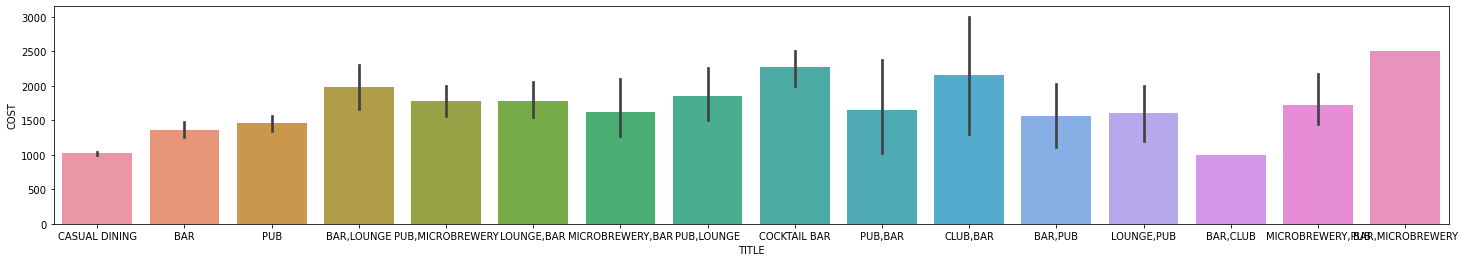

In [58]:
fig_of_size(25,4)
sns.barplot(x='TITLE',y='COST',data=df_cleaned[df_cleaned.TITLE.str.contains('PUB|BAR|CASUAL DINING')])

In [59]:
df_cleaned[df_cleaned.TITLE.str.contains('CASUAL DINING')]['CUISINES'].unique()

array(['Malwani, Goan, North Indian', 'Asian, Modern Indian, Japanese',
       'North Indian, Chinese, Biryani, Hyderabadi', ...,
       'Biryani, Chinese, Mughlai, North Indian, Hyderabadi',
       'European, Mediterranean, Italian, Sushi', 'Sindhi, Street Food'],
      dtype=object)

In [60]:
df_cleaned[df_cleaned.TITLE.str.contains('BAR')]['CUISINES'].unique()

array(['Finger Food, North Indian, Continental, Italian',
       'North Indian, Chinese', 'Italian, Continental, Chinese, American',
       'North Indian, Chinese, Andhra',
       'Finger Food, American, Asian, Italian', 'Finger Food',
       'North Indian, Continental, Italian',
       'Continental, Finger Food, South Indian, North Indian, Chinese, Beverages',
       'Finger Food, Asian, Beverages, Chinese, Continental, Italian, North Indian',
       'American, North Indian, Pizza, Finger Food, Continental, Italian',
       'American, Italian, Mexican, Continental',
       'Chinese, Continental, Finger Food, North Indian, Italian, Mexican, ,',
       'Continental, North Indian, Chinese',
       'North Indian, South Indian, Chinese, Continental',
       'Continental, Chinese', 'Finger Food, Seafood', 'Continental',
       'Continental, South Indian, North Indian, Chinese, Finger Food',
       'Finger Food, Salad, Drinks Only, Steak',
       'American, Mexican, Italian', 'Bar Food, Nort

In [61]:
df_cleaned[df_cleaned.TITLE.str.contains('PUB')]['CUISINES'].unique()

array(['Finger Food, Continental, Asian, North Indian',
       'Finger Food, North Indian',
       'Continental, Chinese, Asian, Italian, Pizza',
       'Russian, Continental, North Indian', 'Bar Food, North Indian',
       'Finger Food',
       'Finger Food, Continental, Mexican, Burger, American, Desserts,',
       'Finger Food, Continental', 'North Indian, Chinese, Continental',
       'Asian, Continental, European',
       'Continental, Burger, Italian, Pizza, North Indian, Salad',
       'Continental, Italian, North Indian, Finger Food, German',
       'Chinese, South Indian', 'Bar Food', 'Continental, Fast Food',
       'Continental, American, Tex-Mex, North Indian',
       'Finger Food, Italian, Continental',
       'Mediterranean, Mexican, North Indian, American',
       'Continental, North Indian, Chinese, Italian',
       'American, Continental',
       'Continental, Finger Food, Pizza, North Indian, Bar Food',
       'American, Continental, North Indian, Mediterranean',
    

* As all Pubs and Bars also have same cuisines and also they open at same time on the day.
* Let's merge them into a single category.
* Though we cannot group them with casual dining as , the suisines served ny the casual dining is very different than the bas/pub ones.The food at casual dinings is less snacky, its more that people at lunch and dinner time.

In [62]:
df_cleaned[df_cleaned.TITLE.str.contains('PUB|BAR')]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
28,BAR,4222,"Finger Food, North Indian, Continental, Italian",11am – 11pm (Mon-Sun),Chennai,Neelangarai,4.3,150 votes,1000.0
29,PUB,6577,"Finger Food, Continental, Asian, North Indian",12:30pm – 1am (Mon-Sun),Bangalore,Koramangala 5th Block,4.2,2456 votes,1400.0
99,BAR,13495,"North Indian, Chinese","11am – 12midnight (Mon-Thu),11am – 1am (Fri-Sun)",Bangalore,Koramangala 1st Block,3.7,23 votes,800.0
125,"BAR,LOUNGE",4214,"Italian, Continental, Chinese, American",12noon – 1am (Mon-Sun),New Delhi,Connaught Place,4.3,1293 votes,1600.0
280,BAR,2982,"North Indian, Chinese, Andhra",12:30pm – 11pm (Mon-Sun),Hyderabad,Kothapet,3.6,510 votes,1000.0
...,...,...,...,...,...,...,...,...,...
4034,PUB,15434,"Finger Food, Chinese, South Indian, Bar Food",11am – 12midnight (Mon-Sun),Chennai,Pallikaranai,3.8,68 votes,NaN
4070,BAR,7634,"Italian, North Indian, Continental",5pm – 12midnight (Mon-Sun),Chennai,Nungambakkam,4.0,92 votes,NaN
4116,"PUB,BAR",10286,"Arabian, Lebanese, North Indian, Kebab, Iranian",12:30pm – 1am (Mon-Sun),Gurgaon,DLF Cyber City,4.2,1294 votes,NaN
4151,"PUB,MICROBREWERY",8402,"Finger Food, American, Continental, North Indi...",1pm – 1am (Mon-Sun),Gurgaon,Golf Course Road,4.6,4064 votes,NaN


In [63]:
bar_title = df_cleaned[df_cleaned.TITLE.str.contains('BAR|PUB')].TITLE.value_counts().index

In [64]:
bar_title

Index(['BAR', 'PUB', 'LOUNGE,BAR', 'PUB,MICROBREWERY', 'BAR,LOUNGE',
       'MICROBREWERY,PUB', 'BAR,PUB', 'PUB,BAR', 'PUB,LOUNGE',
       'MICROBREWERY,BAR', 'COCKTAIL BAR', 'CLUB,BAR', 'LOUNGE,PUB',
       'BAR,CLUB', 'BAR,MICROBREWERY'],
      dtype='object')

In [65]:
len(bar_title)

15

In [66]:
# mapper
df_cleaned.TITLE.replace(to_replace=bar_title,value='BAR_PUB',inplace=True)

In [67]:
df_cleaned.TITLE.value_counts()

CASUAL DINING               6333
QUICK BITES                 6139
None                        1287
CAFE                         984
DESSERT PARLOUR              651
BAKERY                       392
BAR_PUB                      300
BEVERAGE SHOP                216
LOUNGE                       136
FOOD COURT                   110
KIOSK                         73
MESS                          68
SWEET SHOP                    67
DHABA                         61
FOOD TRUCK                    37
CLUB                          26
MICROBREWERY                  12
PAAN SHOP                      5
LOUNGE,CLUB                    3
CONFECTIONERY                  3
SWEET SHOP,BAKERY              2
BAKERY,BEVERAGE SHOP           2
LOUNGE,MICROBREWERY            2
BAKERY,SWEET SHOP              2
BHOJANALYA                     1
SWEET SHOP,BEVERAGE SHOP       1
BAKERY,CONFECTIONERY           1
BEVERAGE SHOP,FOOD COURT       1
MICROBREWERY,LOUNGE            1
KIOSK,FOOD COURT               1
BAKERY,FOO

<--- Beverage --->

In [68]:
df_cleaned[df_cleaned.TITLE.str.contains('BEVERAGE')]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
34,BEVERAGE SHOP,1494,"Beverages, Coffee, Tea",6am – 11pm (Mon-Sun),Chennai,Besant Nagar,2.7,132 votes,500.0
78,BEVERAGE SHOP,7739,Beverages,10am – 11pm (Mon-Sun),Bangalore,Kengeri,3.9,8 votes,150.0
101,BEVERAGE SHOP,13927,"Juices, Fast Food, Sandwich, Beverages","10am – 10pm (Mon),9:30am – 10pm (Tue),9:30am –...",Chennai,Poonamalle,3.4,19 votes,250.0
130,BEVERAGE SHOP,4940,"Beverages, Desserts, Ice Cream",11am – 1:30am (Mon-Sun),Andheri West,Shastri Nagar - Lokhandwala,4.2,317 votes,200.0
176,BEVERAGE SHOP,2680,Juices,9:30am – 10:30pm (Mon-Sun),Bangalore,Jayanagar,4.1,88 votes,100.0
...,...,...,...,...,...,...,...,...,...
3759,BEVERAGE SHOP,7045,Beverages,9:30am – 10pm (Mon-Sun),Chennai,Mylapore,4.5,151 votes,NaN
3878,BEVERAGE SHOP,8279,"Beverages, Desserts",11am – 11:30pm (Mon-Sun),Chennai,Adyar,4.2,224 votes,NaN
3923,BEVERAGE SHOP,1983,"Beverages, Bubble Tea, Tea",11am – 11pm (Mon-Sun),Bangalore,Whitefield,4.1,82 votes,NaN
3935,BEVERAGE SHOP,2371,Beverages,12noon – 2am (Mon-Sun),Chennai,Gopalapuram,4.0,56 votes,NaN


In [69]:
bev_title = df_cleaned[df_cleaned.TITLE.str.contains('BEVERAGE')].TITLE.value_counts().index

In [70]:
bev_title

Index(['BEVERAGE SHOP', 'BAKERY,BEVERAGE SHOP', 'SWEET SHOP,BEVERAGE SHOP',
       'BEVERAGE SHOP,FOOD COURT'],
      dtype='object')

In [71]:
# mapper
df_cleaned.TITLE.replace(to_replace=bev_title,value='BEVERAGE SHOP',inplace=True)

In [72]:
df_cleaned.TITLE.value_counts()

CASUAL DINING               6333
QUICK BITES                 6139
None                        1287
CAFE                         984
DESSERT PARLOUR              651
BAKERY                       392
BAR_PUB                      300
BEVERAGE SHOP                220
LOUNGE                       136
FOOD COURT                   110
KIOSK                         73
MESS                          68
SWEET SHOP                    67
DHABA                         61
FOOD TRUCK                    37
CLUB                          26
MICROBREWERY                  12
PAAN SHOP                      5
LOUNGE,CLUB                    3
CONFECTIONERY                  3
SWEET SHOP,BAKERY              2
LOUNGE,MICROBREWERY            2
BAKERY,SWEET SHOP              2
BAKERY,CONFECTIONERY           1
BHOJANALYA                     1
MICROBREWERY,LOUNGE            1
KIOSK,FOOD COURT               1
BAKERY,FOOD COURT              1
MEAT SHOP                      1
CLUB,MICROBREWERY              1
SWEET SHOP

<--- Bakery and Confectionery and Sweet Shop --->

In [73]:
df_cleaned[df_cleaned.TITLE.str.contains('BAKERY|CONFECTIONERY|SWEET SHOP')]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
76,BAKERY,2646,"Bakery, Desserts",10am – 1am (Mon-Sun),Hyderabad,Gachibowli,3.1,145 votes,300.0
100,BAKERY,4933,"Bakery, Desserts",9am – 11pm (Mon-Sun),Chennai,Anna Nagar East,3.8,66 votes,400.0
108,BAKERY,7776,"Bakery, Desserts, Beverages",7am – 12midnight (Mon-Sun),Bangalore,BTM,4.0,17 votes,450.0
124,BAKERY,2633,"Bakery, Desserts",9am – 12midnight (Mon-Sun),Mumbai,Jogeshwari,3.3,6 votes,400.0
149,BAKERY,2641,Bakery,10am – 11pm (Mon-Sun),Madhuranagar,Behind Allahabad Bank,3.5,32 votes,300.0
...,...,...,...,...,...,...,...,...,...
4157,SWEET SHOP,6789,"Mithai, Street Food","8am – 11:30pm (Mon),9:30am – 10pm (Tue-Sun)",Mumbai,Chembur,4.2,224 votes,NaN
4178,BAKERY,12905,"Bakery, Desserts",8am – 9pm (Mon-Sun),Kochi,Tripunithura,3.4,10 votes,NaN
4186,BAKERY,13622,"Bakery, Desserts",7am – 12midnight (Mon-Sun),Mumbai,Mira Road,4.2,598 votes,NaN
4204,BAKERY,15219,Bakery,10am – 10pm (Mon-Sun),Chennai,Perungudi,3.2,31 votes,NaN


In [74]:
bakery_title = df_cleaned[df_cleaned.TITLE.str.contains('BAKERY|CONFECTIONERY|SWEET SHOP')].TITLE.value_counts().index

In [75]:
bakery_title

Index(['BAKERY', 'SWEET SHOP', 'CONFECTIONERY', 'SWEET SHOP,BAKERY',
       'BAKERY,SWEET SHOP', 'BAKERY,FOOD COURT', 'BAKERY,CONFECTIONERY',
       'SWEET SHOP,CONFECTIONERY'],
      dtype='object')

In [76]:
# mapper
df_cleaned.TITLE.replace(to_replace=bakery_title,value='BAKERY_SWEETS',inplace=True)

In [77]:
df_cleaned.TITLE.value_counts()

CASUAL DINING          6333
QUICK BITES            6139
None                   1287
CAFE                    984
DESSERT PARLOUR         651
BAKERY_SWEETS           469
BAR_PUB                 300
BEVERAGE SHOP           220
LOUNGE                  136
FOOD COURT              110
KIOSK                    73
MESS                     68
DHABA                    61
FOOD TRUCK               37
CLUB                     26
MICROBREWERY             12
PAAN SHOP                 5
LOUNGE,CLUB               3
LOUNGE,MICROBREWERY       2
BHOJANALYA                1
MICROBREWERY,LOUNGE       1
KIOSK,FOOD COURT          1
MEAT SHOP                 1
CLUB,MICROBREWERY         1
Name: TITLE, dtype: int64

In [78]:
df_cleaned[df_cleaned.TITLE.str.contains('FOOD COURT')]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
133,FOOD COURT,5171,Desserts,11am – 11pm (Mon-Sun),Hyderabad,Hitech City,3.8,52 votes,180.0
222,FOOD COURT,12024,"Hyderabadi, Biryani","7am – 3am (Mon-Fri),12noon – 3am (Sat-Sun)",Hyderabad,Madhapur,3.5,103 votes,300.0
470,FOOD COURT,15108,"Tibetan, Momos",11am – 11pm (Mon-Sun),Bangalore,Whitefield,3.6,67 votes,400.0
1037,FOOD COURT,10040,South Indian,10am – 10pm (Mon-Sun),Chennai,Vadapalani,3.4,47 votes,500.0
1309,FOOD COURT,724,North Indian,11am – 11pm (Mon-Sun),Dwarka,Sector 12,3.5,119 votes,400.0
...,...,...,...,...,...,...,...,...,...
3593,FOOD COURT,12871,"Burger, Sandwich, Beverages",10:30am – 10pm (Mon-Sun),Bangalore,Bannerghatta Road,NEW,NaN,NaN
3821,FOOD COURT,5008,Italian,11am – 11pm (Mon-Sun),Hyderabad,Kukatpally,3.8,149 votes,NaN
3833,FOOD COURT,10153,North Indian,9am – 11pm (Mon-Sun),Bangalore,Bellandur,3.3,7 votes,NaN
4097,FOOD COURT,11169,Desserts,10:30am – 11:30pm (Mon-Sun),Hyderabad,Dilsukhnagar,3.8,55 votes,NaN


In [79]:
df_cleaned[df_cleaned.TITLE.str.contains('DHABA')]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
515,DHABA,1663,North Indian,7:30am – 11pm (Mon-Sun),Faridabad,NIT,3.6,77 votes,500.0
647,DHABA,13537,"Bihari, North Indian","12noon – 3:30pm, 6:30pm – 10:30pm (Mon-Sun)",Chennai,Velachery,3.6,60 votes,300.0
2101,DHABA,8838,North Indian,"10am – 4pm, 7pm – 11pm (Mon-Sun)",New Delhi,Shahdara,3.7,323 votes,300.0
2421,DHABA,10636,North Indian,12noon – 1am (Mon-Sun),Bangalore,Majestic,3.7,81 votes,350.0
2532,DHABA,6939,"Chinese, North Indian",12noon – 11:30pm (Mon-Sun),New Delhi,Rajouri Garden,3.9,145 votes,600.0
...,...,...,...,...,...,...,...,...,...
2672,DHABA,9070,North Indian,24 Hours (Mon-Sun),Gurgaon,DLF Cyber City,3.6,195 votes,NaN
2949,DHABA,8657,North Indian,"10am – 11pm (Mon-Fri),11am – 12midnight (Sat-Sun)",Thane,Thane West,NEW,NaN,NaN
3611,DHABA,5501,"North Indian, Chinese",8am – 11pm (Mon-Sun),Bangalore,Jalahalli,3.6,15 votes,NaN
3684,DHABA,4536,"North Indian, Chinese, Fast Food, Indian, Biry...",9:40am – 2am (Mon-Sun),Gurgaon,Sector 53,3.6,547 votes,NaN


In [80]:
df_cleaned[df_cleaned.TITLE.str.contains('LOUNGE')]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
147,LOUNGE,12989,"Continental, North Indian, Chinese, Finger Food",12noon – 12midnight (Mon-Sun),New Delhi,Rajouri Garden,4.2,481 votes,1100.0
171,LOUNGE,14908,"Pizza, Continental",5pm – 12midnight (Mon-Sun),Chennai,Ramapuram,3.9,71 votes,1200.0
195,LOUNGE,6827,"North Indian, Chinese, Continental, Italian",11am – 1am (Mon-Sun),New Delhi,Vijay Nagar,4.3,361 votes,1000.0
459,LOUNGE,13339,Finger Food,7pm – 11:45pm (Mon-Sun),Hyderabad,Begumpet,3.5,58 votes,2000.0
492,LOUNGE,8724,European,12noon – 12midnight (Mon-Sun),New Delhi,Hauz Khas Village,4.1,907 votes,1800.0
...,...,...,...,...,...,...,...,...,...
3681,LOUNGE,15328,"Chinese, North Indian",12noon – 12:30AM (Mon-Sun),New Delhi,Netaji Subhash Place,4.4,401 votes,NaN
3817,LOUNGE,2062,"Continental, Steak",10:30am – 1am (Mon-Sun),Bangalore,Indiranagar,4.1,606 votes,NaN
4011,LOUNGE,14578,"Continental, Chinese, Mughlai, Finger Food, No...",11:30am – 12midnight (Mon-Sun),Mumbai,Powai,4.1,735 votes,NaN
4014,LOUNGE,1135,"North Indian, Chinese, Italian, Continental",11am – 12:30AM (Mon-Sun),New Delhi,Dwarka,4.7,120 votes,NaN


In [81]:
df_cleaned[df_cleaned.TITLE.str.contains('MICROBREWERY')]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
7,MICROBREWERY,1249,Bar Food,1pm – 1am (Mon-Sun),Gurgaon,Sector 29,4.3,1612 votes,1600.0
304,MICROBREWERY,10512,"Bar Food, Modern Indian",12:30pm – 1am (Mon-Sun),Gurgaon,Sector 29,4.3,4635 votes,1500.0
637,MICROBREWERY,12872,"Finger Food, Asian, American",1pm – 1am (Mon-Sun),Gurgaon,Golf Course Road,4.4,821 votes,2400.0
5216,MICROBREWERY,10320,"Bar Food, North Indian",1:30pm – 12midnight (Mon-Sun),Gurgaon,Sector 29,4.3,831 votes,1100.0
5226,"CLUB,MICROBREWERY",6403,"Finger Food, Italian",12noon – 12midnight (Mon-Sun),Hyderabad,Jubilee Hills,3.9,1058 votes,2000.0
5374,"MICROBREWERY,LOUNGE",1443,"Continental, Italian","12noon – 11:30pm (Mon-Tue),12noon – 1am (Wed-Sun)",Bangalore,Residency Road,4.3,2246 votes,1700.0
5546,MICROBREWERY,14151,"Continental, Finger Food",12noon – 12midnight (Mon-Sun),Bangalore,JP Nagar,4.3,993 votes,1500.0
6446,MICROBREWERY,15516,"American, Pizza, North Indian",12noon – 12midnight (Mon-Sun),Hyderabad,Jubilee Hills,4.6,3708 votes,1700.0
6690,MICROBREWERY,2284,"Continental, North Indian, Italian, South Indi...",12:30pm – 1am (Mon-Sun),Bangalore,Sarjapur Road,4.9,17060 votes,1600.0
10961,"LOUNGE,MICROBREWERY",13176,"North Indian, Continental, Italian, Chinese, K...",12noon – 12midnight (Mon-Sun),Gurgaon,Golf Course Road,4.3,510 votes,2000.0


In [82]:
df_cleaned[df_cleaned.TITLE.str.contains('CLUB')]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
337,CLUB,7407,"Finger Food, Italian","Closed (Mon),7pm – 1am (Tue),10pm – 1am (Wed-Sun)",New Delhi,Barakhamba Road,3.9,998 votes,5000.0
594,CLUB,9600,"Chinese, Continental, North Indian","11am – 11:30pm (Mon, Tue, Wed, Thu, Sun), 11am...",Bangalore,Brigade Road,4.1,2243 votes,2000.0
660,CLUB,5138,"North Indian, Chinese","11:30am – 11:30pm (Mon, Tue, Wed, Thu, Sun)...",Outer Ring Road,Varthur Hobli,4.2,714 votes,1400.0
2209,CLUB,15245,"North Indian, Continental, Chinese, Finger Food",5:30pm – 1:30am (Mon-Sun),Mumbai,Vasai,NEW,NaN,1500.0
2610,CLUB,10424,"North Indian, Continental, Bar Food","Closed (Mon, Tue, Wed, Thu, Sun), 9:30pm – 2am...",New Delhi,Chanakyapuri,3.9,382 votes,4500.0
2932,CLUB,12573,"North Indian, Mughlai, Finger Food",3pm – 12midnight (Mon-Sun),Hyderabad,Jubilee Hills,3.4,400 votes,1100.0
5226,"CLUB,MICROBREWERY",6403,"Finger Food, Italian",12noon – 12midnight (Mon-Sun),Hyderabad,Jubilee Hills,3.9,1058 votes,2000.0
5384,"LOUNGE,CLUB",7383,Finger Food,8pm – 12midnight (Mon-Sun),Hyderabad,Somajiguda,4.2,926 votes,2400.0
7073,CLUB,7266,"Continental, North Indian, Bar Food",10pm – 4am (Mon-Sun),New Delhi,Chanakyapuri,4.2,36 votes,4000.0
7920,CLUB,13132,"Continental, North Indian, Finger Food, Italian","Closed (Mon-Thu),7pm – 12:30AM (Fri-Sat),7pm –...",Hyderabad,Jubilee Hills,4.2,507 votes,2000.0


<--- MICROBRWERY, LOUNGE and CLUBS --->

* We are taking lounge,clubs and microbrewery together as they have same costings,they serve same food and they both have very high ratings.

In [83]:
df_cleaned[df_cleaned.TITLE.str.contains('MICROBREWERY|LOUNGE|CLUB')]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
7,MICROBREWERY,1249,Bar Food,1pm – 1am (Mon-Sun),Gurgaon,Sector 29,4.3,1612 votes,1600.0
147,LOUNGE,12989,"Continental, North Indian, Chinese, Finger Food",12noon – 12midnight (Mon-Sun),New Delhi,Rajouri Garden,4.2,481 votes,1100.0
171,LOUNGE,14908,"Pizza, Continental",5pm – 12midnight (Mon-Sun),Chennai,Ramapuram,3.9,71 votes,1200.0
195,LOUNGE,6827,"North Indian, Chinese, Continental, Italian",11am – 1am (Mon-Sun),New Delhi,Vijay Nagar,4.3,361 votes,1000.0
304,MICROBREWERY,10512,"Bar Food, Modern Indian",12:30pm – 1am (Mon-Sun),Gurgaon,Sector 29,4.3,4635 votes,1500.0
...,...,...,...,...,...,...,...,...,...
3817,LOUNGE,2062,"Continental, Steak",10:30am – 1am (Mon-Sun),Bangalore,Indiranagar,4.1,606 votes,NaN
3926,MICROBREWERY,87,"Continental, Mexican, Beverages, Italian, Nort...",12noon – 12midnight (Mon-Sun),Hyderabad,Jubilee Hills,4.4,2585 votes,NaN
4011,LOUNGE,14578,"Continental, Chinese, Mughlai, Finger Food, No...",11:30am – 12midnight (Mon-Sun),Mumbai,Powai,4.1,735 votes,NaN
4014,LOUNGE,1135,"North Indian, Chinese, Italian, Continental",11am – 12:30AM (Mon-Sun),New Delhi,Dwarka,4.7,120 votes,NaN


In [84]:
lounge_title = df_cleaned[df_cleaned.TITLE.str.contains('MICROBREWERY|LOUNGE|CLUB')].TITLE.value_counts().index

In [85]:
lounge_title

Index(['LOUNGE', 'CLUB', 'MICROBREWERY', 'LOUNGE,CLUB', 'LOUNGE,MICROBREWERY',
       'CLUB,MICROBREWERY', 'MICROBREWERY,LOUNGE'],
      dtype='object')

In [86]:
# mapper
df_cleaned.TITLE.replace(to_replace=lounge_title,value='LOUNGE_CLUB_MICROBREWERY',inplace=True)

In [87]:
df_cleaned.TITLE.value_counts()

CASUAL DINING               6333
QUICK BITES                 6139
None                        1287
CAFE                         984
DESSERT PARLOUR              651
BAKERY_SWEETS                469
BAR_PUB                      300
BEVERAGE SHOP                220
LOUNGE_CLUB_MICROBREWERY     181
FOOD COURT                   110
KIOSK                         73
MESS                          68
DHABA                         61
FOOD TRUCK                    37
PAAN SHOP                      5
KIOSK,FOOD COURT               1
MEAT SHOP                      1
BHOJANALYA                     1
Name: TITLE, dtype: int64

<-- Food Court, Food Truck and KIOSK --->

* All of these 3 have low pricings, they all serve snacks and fast foods, thus we clubb them together.

In [88]:
df_cleaned[df_cleaned.TITLE.str.contains('FOOD COURT')]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
133,FOOD COURT,5171,Desserts,11am – 11pm (Mon-Sun),Hyderabad,Hitech City,3.8,52 votes,180.0
222,FOOD COURT,12024,"Hyderabadi, Biryani","7am – 3am (Mon-Fri),12noon – 3am (Sat-Sun)",Hyderabad,Madhapur,3.5,103 votes,300.0
470,FOOD COURT,15108,"Tibetan, Momos",11am – 11pm (Mon-Sun),Bangalore,Whitefield,3.6,67 votes,400.0
1037,FOOD COURT,10040,South Indian,10am – 10pm (Mon-Sun),Chennai,Vadapalani,3.4,47 votes,500.0
1309,FOOD COURT,724,North Indian,11am – 11pm (Mon-Sun),Dwarka,Sector 12,3.5,119 votes,400.0
...,...,...,...,...,...,...,...,...,...
3593,FOOD COURT,12871,"Burger, Sandwich, Beverages",10:30am – 10pm (Mon-Sun),Bangalore,Bannerghatta Road,NEW,NaN,NaN
3821,FOOD COURT,5008,Italian,11am – 11pm (Mon-Sun),Hyderabad,Kukatpally,3.8,149 votes,NaN
3833,FOOD COURT,10153,North Indian,9am – 11pm (Mon-Sun),Bangalore,Bellandur,3.3,7 votes,NaN
4097,FOOD COURT,11169,Desserts,10:30am – 11:30pm (Mon-Sun),Hyderabad,Dilsukhnagar,3.8,55 votes,NaN


In [89]:
df_cleaned[df_cleaned.TITLE.str.contains('FOOD TRUCK')]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
214,FOOD TRUCK,1480,BBQ,"6:30pm – 10:30pm (Mon, Wed, Thu, Fri, Sat, Sun...",Thane,Ambernath,NEW,NaN,300.0
1817,FOOD TRUCK,14274,"BBQ, Burger","8pm – 11:44pm (Mon),8pm – 11:45pm (Tue-Sun)",Metro Pillar No 21. Mettuguda main road near r...,Mettuguda,3.9,176 votes,500.0
2841,FOOD TRUCK,13802,Italian,4:30pm – 10:30pm (Mon-Sun),Chennai,Ashok Nagar,3.7,38 votes,300.0
3027,FOOD TRUCK,1157,Fast Food,4:30pm – 1am (Mon-Sun),Secunderabad,Paradise Circle,3.7,60 votes,300.0
3143,FOOD TRUCK,3687,Momos,2pm – 11pm (Mon-Sun),Thane West,Vasant Vihar,4.3,254 votes,300.0
3243,FOOD TRUCK,5273,"Biryani, North Indian","(Mon),12:30AM – 10:30am (Tue-Sun)",Bangalore,Nagarbhavi,NEW,NaN,250.0
3432,FOOD TRUCK,11175,"Rolls, Fast Food",5pm – 10:30pm (Mon-Sun),Hyderabad,Amberpet,4.1,211 votes,200.0
4591,FOOD TRUCK,4100,South Indian,"Closed (Mon),5pm – 11pm (Tue-Sun)",Lingampally,Location Varies,4.0,221 votes,300.0
4704,FOOD TRUCK,2908,"Tibetan, Chinese, Momos",4:30pm – 11pm (Mon-Sun),Chennai,Thiruvanmiyur,3.9,167 votes,250.0
5136,FOOD TRUCK,147,South Indian,6pm – 11pm (Mon-Sun),Kochi,Kakkanad,-,NaN,250.0


In [90]:
df_cleaned[df_cleaned.TITLE.str.contains('KIOSK')]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
305,KIOSK,11166,"Fast Food, Rolls",12noon – 10:30pm (Mon-Sun),Bangalore,Whitefield,3.5,13 votes,150.0
486,KIOSK,7152,Street Food,4pm – 10pm (Mon-Sun),Kilpauk,Davidpuram,3.2,26 votes,200.0
547,KIOSK,6482,"Desserts, Ice Cream","4pm – 12midnight (Mon, Wed, Thu, Fri, Sat, Sun...",Chennai,Anna Nagar East,3.5,53 votes,200.0
828,KIOSK,8906,Momos,6pm – 2am (Mon-Sun),Hyderabad,Gachibowli,4.2,401 votes,200.0
1355,KIOSK,15313,"Fast Food, Rolls",10:30am – 10pm (Mon-Sun),Chennai,Shenoy Nagar,3.4,54 votes,200.0
...,...,...,...,...,...,...,...,...,...
2533,KIOSK,6310,Desserts,11am – 11pm (Mon-Sun),Bangalore,Bannerghatta Road,NEW,NaN,NaN
2656,KIOSK,1577,Fast Food,2:30pm – 10:30pm (Mon-Sun),Hyderabad,Kukatpally,3.9,155 votes,NaN
2938,KIOSK,3405,"Bakery, Desserts",9:30am – 10:30pm (Mon-Sun),Forum Sujana Mall Opposite to Malaysian township,Shop No - VG 16,3.8,50 votes,NaN
3453,KIOSK,11947,Mughlai,10am – 11pm (Mon-Sun),New Delhi,Rajinder Nagar,3.6,99 votes,NaN


In [91]:
food_court_title = df_cleaned[df_cleaned.TITLE.str.contains('FOOD COURT|FOOD TRUCK|KIOSK')].TITLE.value_counts().index

In [92]:
food_court_title

Index(['FOOD COURT', 'KIOSK', 'FOOD TRUCK', 'KIOSK,FOOD COURT'], dtype='object')

In [93]:
# mapper
df_cleaned.TITLE.replace(to_replace=food_court_title,value='FOOD_COURT_TRUCK',inplace=True)

In [94]:
df_cleaned.TITLE.value_counts()

CASUAL DINING               6333
QUICK BITES                 6139
None                        1287
CAFE                         984
DESSERT PARLOUR              651
BAKERY_SWEETS                469
BAR_PUB                      300
FOOD_COURT_TRUCK             221
BEVERAGE SHOP                220
LOUNGE_CLUB_MICROBREWERY     181
MESS                          68
DHABA                         61
PAAN SHOP                      5
BHOJANALYA                     1
MEAT SHOP                      1
Name: TITLE, dtype: int64

<--- DHABA and MESS --->

In [95]:
df_cleaned[df_cleaned.TITLE.str.contains('MESS|DHABA|BHOJANALYA')]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
283,MESS,9963,Kerala,11:30am – 11pm (Mon-Sun),Chennai,Chengalpattu,3.6,39 votes,200.0
425,MESS,5180,Andhra,"12noon – 4pm, 7pm – 11pm (Mon-Sun)",Chennai,GST Road,3.8,82 votes,200.0
515,DHABA,1663,North Indian,7:30am – 11pm (Mon-Sun),Faridabad,NIT,3.6,77 votes,500.0
647,DHABA,13537,"Bihari, North Indian","12noon – 3:30pm, 6:30pm – 10:30pm (Mon-Sun)",Chennai,Velachery,3.6,60 votes,300.0
708,MESS,9460,Kerala,8am – 11pm (Mon-Sun),Chennai,Navallur,3.3,104 votes,200.0
...,...,...,...,...,...,...,...,...,...
3684,DHABA,4536,"North Indian, Chinese, Fast Food, Indian, Biry...",9:40am – 2am (Mon-Sun),Gurgaon,Sector 53,3.6,547 votes,NaN
3828,MESS,12634,South Indian,10am – 10:30pm (Mon-Sun),Chennai,Tambaram,3.6,45 votes,NaN
4081,BHOJANALYA,12186,"North Indian, Chinese","10am – 4pm, 6pm – 10:30pm (Mon-Sun)",Hyderabad,Lingampally,2.8,183 votes,NaN
4149,DHABA,9481,"Biryani, Andhra","11:30am – 3:30pm, 7pm – 10:30pm (Mon-Sun)",Hyderabad,Ameerpet,2.9,1656 votes,NaN


In [96]:
dhaba_title = df_cleaned[df_cleaned.TITLE.str.contains('MESS|DHABA|BHOJANALYA')].TITLE.value_counts().index

In [97]:
dhaba_title

Index(['MESS', 'DHABA', 'BHOJANALYA'], dtype='object')

In [98]:
# mapper
df_cleaned.TITLE.replace(to_replace=dhaba_title,value='DHABA_MESS',inplace=True)

In [99]:
df_cleaned.TITLE.value_counts()

CASUAL DINING               6333
QUICK BITES                 6139
None                        1287
CAFE                         984
DESSERT PARLOUR              651
BAKERY_SWEETS                469
BAR_PUB                      300
FOOD_COURT_TRUCK             221
BEVERAGE SHOP                220
LOUNGE_CLUB_MICROBREWERY     181
DHABA_MESS                   130
PAAN SHOP                      5
MEAT SHOP                      1
Name: TITLE, dtype: int64

<-- PAAN and MEAT shop -->

* Let's add Paan in Food Court and Eliminate the Meat Sample.

In [100]:
df_cleaned[df_cleaned.TITLE.str.contains('PAAN SHOP')]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
4653,PAAN SHOP,7823,Paan,11am – 11pm (Mon-Sun),Powai,Lake Homes & Hiranandani Gardens,4.0,80 votes,150.0
8856,PAAN SHOP,10036,Paan,10am – 11pm (Mon-Sun),New Delhi,Connaught Place,4.5,334 votes,100.0
9813,PAAN SHOP,14524,Paan,12:30pm – 12:30AM (Mon-Sun),Mumbai,Girgaum,3.3,9 votes,100.0
11105,PAAN SHOP,8534,Paan,"11:30am – 11:30pm (Mon-Fri),11:30am – 12midnig...",Bangalore,BTM,-,NaN,100.0
2768,PAAN SHOP,14524,Paan,12:30pm – 12:30AM (Mon-Sun),Mumbai,Girgaum,3.3,9 votes,NaN


In [101]:
df_cleaned[df_cleaned.TITLE.str.contains('MEAT')]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
1216,MEAT SHOP,10300,North Indian,"7pm – 11pm (Mon, Wed, Thu, Fri, Sat, Sun), Clo...",New Delhi,Karol Bagh,3.9,135 votes,300.0


In [102]:
paan_title = df_cleaned[df_cleaned.TITLE.str.contains('PAAN')].TITLE.value_counts().index

In [103]:
paan_title

Index(['PAAN SHOP'], dtype='object')

In [104]:
# mapper
df_cleaned.TITLE.replace(to_replace=paan_title,value='FOOD_COURT_TRUCK',inplace=True)

In [105]:
df_cleaned = df_cleaned[df_cleaned.TITLE != 'MEAT SHOP']

In [106]:
df_cleaned.TITLE.value_counts()

CASUAL DINING               6333
QUICK BITES                 6139
None                        1287
CAFE                         984
DESSERT PARLOUR              651
BAKERY_SWEETS                469
BAR_PUB                      300
FOOD_COURT_TRUCK             226
BEVERAGE SHOP                220
LOUNGE_CLUB_MICROBREWERY     181
DHABA_MESS                   130
Name: TITLE, dtype: int64

In [107]:
df_cleaned.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0
1,CASUAL DINING,13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0
4,DESSERT PARLOUR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0


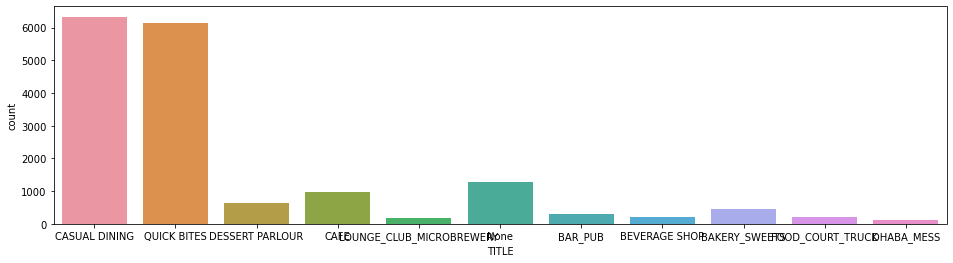

In [108]:
fig_of_size(16,4)
sns.countplot(df_cleaned.TITLE)

In [109]:
## adressing the missing values from the title feature.

In [110]:
df_cleaned.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0
1,CASUAL DINING,13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0
4,DESSERT PARLOUR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0


In [111]:
df_cleaned.TITLE.isna().sum()

0

In [112]:
df_cleaned.TITLE.replace('None',np.nan,inplace=True)

In [113]:
df_cleaned.TITLE.isna().sum()

1287

In [114]:
df_cleaned[df_cleaned.TITLE.isna()] 

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
22,NaN,12499,"North Indian, Fast Food, Mughlai, Rolls",11am – 3am (Mon-Sun),New Delhi,SDA,4.0,1191 votes,450.0
69,NaN,11096,"Pizza, Fast Food",11am – 11pm (Mon-Sun),New Delhi,Kalkaji,NEW,NaN,200.0
83,NaN,1100,"Chinese, Thai, Asian, Malaysian, Vietnamese, J...",12noon – 1am (Mon-Sun),New Delhi,East of Kailash,4.2,1120 votes,1500.0
93,NaN,7400,"Italian, Continental, Chinese, Thai, American,...",9pm – 7am (Mon-Sun),Bangalore,BTM,3.4,15 votes,300.0
102,NaN,14529,"Burger, Sandwich","11am – 10pm (Mon, Tue, Wed, Thu, Fri, Sun), 11...",Chennai,Purasaiwalkam,3.5,27 votes,200.0
...,...,...,...,...,...,...,...,...,...
4144,NaN,2757,"North Indian, Chinese, Andhra",11:30am – 10:30pm (Mon-Sun),Hyderabad,Jubilee Hills,3.1,34 votes,NaN
4147,NaN,4403,"Bakery, Desserts","Closed (Mon),8am – 9pm (Tue-Sun)",Secunderabad,Sainikpuri,4.9,775 votes,NaN
4180,NaN,13568,"Chinese, North Indian","11am – 4pm, 6pm – 11:30pm (Mon-Sun)",Mumbai,Khar,3.3,9 votes,NaN
4218,NaN,11667,"North Indian, Biryani",12:30pm – 10:15pm (Mon-Sun),Bangalore,Jalahalli,3.3,6 votes,NaN


In [115]:
## CUISINES

In [257]:
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0


In [258]:
df.CUISINES.value_counts()

North Indian                                716
North Indian, Chinese                       714
South Indian                                706
Fast Food                                   364
Chinese                                     226
                                           ... 
North Indian, Chinese, Seafood, Kebab         1
Japanese, Italian, North Indian, Chinese      1
Cafe, Italian, Bakery, Desserts               1
Rolls, Burger                                 1
American, Pizza, North Indian                 1
Name: CUISINES, Length: 5183, dtype: int64

In [267]:
show_all_rows(df.CUISINES.value_counts())

North Indian                                                                      716
North Indian, Chinese                                                             714
South Indian                                                                      706
Fast Food                                                                         364
Chinese                                                                           226
Bakery, Desserts                                                                  190
Bakery                                                                            187
South Indian, North Indian, Chinese                                               183
Cafe                                                                              181
Kerala                                                                            178
Biryani                                                                           164
Street Food                                           

In [119]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [120]:
tf1 = TfidfVectorizer(ngram_range=(1, 1), lowercase=True)
df_cuisine = tf1.fit_transform(df_cleaned.CUISINES)
df_cuisine = pd.DataFrame(data=df_cuisine.toarray(), columns=tf1.get_feature_names())

<--- North Indian --->

In [299]:
df_cleaned[df_cleaned.CUISINES.str.contains('North Indian')].CUISINES

0                         Malwani, Goan, North Indian
2          North Indian, Chinese, Biryani, Hyderabadi
5             North Indian, Chinese, Seafood, Biryani
6          Cafe, Chinese, Pizza, North Indian, Burger
8                          South Indian, North Indian
                            ...                      
4222             North Indian, Chinese, Kebab, Juices
4225                   North Indian, Mughlai, Chinese
4226                   North Indian, Mughlai, Chinese
4227    Biryani, North Indian, Sandwich, Salad, Wraps
4228                        Continental, North Indian
Name: CUISINES, Length: 7221, dtype: object

In [297]:
df_cleaned['n_indian_cuisine'] = df_cleaned.CUISINES.mask(df_cleaned.CUISINES.str.contains('North Indian'),1)
df_cleaned['n_indian_cuisine'] = df_cleaned['n_indian_cuisine'].mask(~df_cleaned.CUISINES.str.contains('North Indian'),0)

In [300]:
df_cleaned

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,CLOSED,n_indian_cuisine
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0,Never_closed,1
1,CASUAL DINING,13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0,Never_closed,0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0,Never_closed,1
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0,Never_closed,0
4,DESSERT PARLOUR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0,Never_closed,0
...,...,...,...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes,NaN,Never_closed,1
4227,NaN,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes,NaN,Never_closed,1
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes,NaN,Never_closed,1
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN,NaN,Never_closed,0


<-- South Indian --->

In [302]:
df_cleaned[df_cleaned.CUISINES.str.contains('South Indian')].CUISINES

8                              South Indian, North Indian
13                                           South Indian
30                             South Indian, North Indian
33                    South Indian, North Indian, Chinese
40                    North Indian, South Indian, Chinese
                              ...                        
4207                  South Indian, North Indian, Chinese
4213                  North Indian, South Indian, Chinese
4214                Fast Food, North Indian, South Indian
4220    South Indian, North Indian, Fast Food, Chinese...
4224                                 Kerala, South Indian
Name: CUISINES, Length: 3034, dtype: object

In [303]:
df_cleaned['s_indian_cuisine'] = df_cleaned.CUISINES.mask(df_cleaned.CUISINES.str.contains('South Indian'),1)
df_cleaned['s_indian_cuisine'] = df_cleaned['s_indian_cuisine'].mask(~df_cleaned.CUISINES.str.contains('South Indian'),0)

In [306]:
df_cleaned.s_indian_cuisine.value_counts()

0    13886
1     3034
Name: s_indian_cuisine, dtype: int64

<--- Chinese --->

In [308]:
df_cleaned[df_cleaned.CUISINES.str.contains('Chinese')].CUISINES

2              North Indian, Chinese, Biryani, Hyderabadi
3                                        Tibetan, Chinese
5                 North Indian, Chinese, Seafood, Biryani
6              Cafe, Chinese, Pizza, North Indian, Burger
10              North Indian, Chinese, Fast Food, Biryani
                              ...                        
4220    South Indian, North Indian, Fast Food, Chinese...
4221                       North Indian, Mughlai, Chinese
4222                 North Indian, Chinese, Kebab, Juices
4225                       North Indian, Mughlai, Chinese
4226                       North Indian, Mughlai, Chinese
Name: CUISINES, Length: 5849, dtype: object

In [309]:
df_cleaned['chinese_cuisine'] = df_cleaned.CUISINES.mask(df_cleaned.CUISINES.str.contains('Chinese'),1)
df_cleaned['chinese_cuisine'] = df_cleaned['chinese_cuisine'].mask(~df_cleaned.CUISINES.str.contains('Chinese'),0)

In [310]:
df_cleaned.chinese_cuisine.value_counts()

0    11071
1     5849
Name: chinese_cuisine, dtype: int64

<--- Bakery and Icecream and Desserts ---> 

In [313]:
df_cleaned[df_cleaned.CUISINES.str.contains('Desserts|Ice Cream|Bakery')].CUISINES

4                          Desserts
19         Bakery, Fast Food, Momos
49              Ice Cream, Desserts
64              Beverages, Desserts
75                 Desserts, Mithai
                   ...             
4197    Bakery, Fast Food, Desserts
4204                         Bakery
4205               Bakery, Desserts
4211     Fast Food, Bakery, Chinese
4215            Ice Cream, Desserts
Name: CUISINES, Length: 2106, dtype: object

In [317]:
df_cleaned['bakery_desserts_cuisine'] = df_cleaned.CUISINES.mask(df_cleaned.CUISINES.str.contains('Desserts|Ice Cream|Bakery'),1)
df_cleaned['bakery_desserts_cuisine'] = df_cleaned['bakery_desserts_cuisine'].mask(~df_cleaned.CUISINES.str.contains('Desserts|Ice Cream|Bakery'),0)

In [318]:
df_cleaned.bakery_desserts_cuisine.value_counts()

0    14814
1     2106
Name: bakery_desserts_cuisine, dtype: int64

<--- Fast Foods and Snacks --->

In [322]:
df_cleaned[df_cleaned.CUISINES.str.contains('Pizza|Burger|Fast Food|Street Food|Finger Food|Rolls|Sandwiches|BBQ|Warps|Momo')].CUISINES

6              Cafe, Chinese, Pizza, North Indian, Burger
10              North Indian, Chinese, Fast Food, Biryani
11                           Fast Food, Burger, Beverages
16                                North Indian, Fast Food
19                               Bakery, Fast Food, Momos
                              ...                        
4211                           Fast Food, Bakery, Chinese
4214                Fast Food, North Indian, South Indian
4220    South Indian, North Indian, Fast Food, Chinese...
4223                                  Sindhi, Street Food
4229                                     Rolls, Beverages
Name: CUISINES, Length: 5173, dtype: object

In [323]:
df_cleaned['fast_food_cuisine'] = df_cleaned.CUISINES.mask(df_cleaned.CUISINES.str.contains('Pizza|Burger|Fast Food|Street Food|Finger Food|Rolls|Sandwiches|BBQ|Warps|Momo'),1)
df_cleaned['fast_food_cuisine'] = df_cleaned['fast_food_cuisine'].mask(~df_cleaned.CUISINES.str.contains('Pizza|Burger|Fast Food|Street Food|Finger Food|Rolls|Sandwiches|BBQ|Warps|Momo'),0)

In [324]:
df_cleaned.fast_food_cuisine.value_counts()

0    11747
1     5173
Name: fast_food_cuisine, dtype: int64

<--- Regional --->

In [365]:
indian_states = 'Andhra Pradesh,Arunachal Pradesh ,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu and Kashmir,Jharkhand,Karnataka,Kerala,Madhya Pradesh,Maharashtra,Manipur,Meghalaya,Mizoram,Nagaland,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal,Andaman and Nicobar Islands,Chandigarh,Dadra and Nagar Haveli,Daman and Diu,Lakshadweep,National Capital Territory of Delhi,Puducherry'.replace(',','|')

In [366]:
indian_states

'Andhra Pradesh|Arunachal Pradesh |Assam|Bihar|Chhattisgarh|Goa|Gujarat|Haryana|Himachal Pradesh|Jammu and Kashmir|Jharkhand|Karnataka|Kerala|Madhya Pradesh|Maharashtra|Manipur|Meghalaya|Mizoram|Nagaland|Odisha|Punjab|Rajasthan|Sikkim|Tamil Nadu|Telangana|Tripura|Uttar Pradesh|Uttarakhand|West Bengal|Andaman and Nicobar Islands|Chandigarh|Dadra and Nagar Haveli|Daman and Diu|Lakshadweep|National Capital Territory of Delhi|Puducherry'

In [373]:
df_cleaned[df_cleaned.CUISINES.str.contains('Maharashtrian|di$|ni$|{}'.format(indian_states))].CUISINES

0                             Malwani, Goan, North Indian
2              North Indian, Chinese, Biryani, Hyderabadi
5                 North Indian, Chinese, Seafood, Biryani
10              North Indian, Chinese, Fast Food, Biryani
14                                          Maharashtrian
                              ...                        
4172                        North Indian, Chinese, Kerala
4191                                               Kerala
4209    Biryani, Chinese, Mughlai, North Indian, Hyder...
4218                                North Indian, Biryani
4224                                 Kerala, South Indian
Name: CUISINES, Length: 1726, dtype: object

In [374]:
df_cleaned['regional_cuisine'] = df_cleaned.CUISINES.mask(df_cleaned.CUISINES.str.contains('Maharashtrian|di$|ni$|{}'.format(indian_states)),1)
df_cleaned['regional_cuisine'] = df_cleaned['regional_cuisine'].mask(~df_cleaned.CUISINES.str.contains('Maharashtrian|di$|ni$|{}'.format(indian_states)),0)

In [375]:
df_cleaned.regional_cuisine.value_counts()

0    15194
1     1726
Name: regional_cuisine, dtype: int64

<--- Beverages and Cafe and Juices --->

In [386]:
df_cleaned[df_cleaned.CUISINES.str.contains('Beverage|Cafe|Juices')].CUISINES

6              Cafe, Chinese, Pizza, North Indian, Burger
11                           Fast Food, Burger, Beverages
24                                 Cafe, Italian, Chinese
31                                              Cafe, Tea
32      Cafe, Continental, European, American, Healthy...
                              ...                        
4187                                                 Cafe
4188                                      Cafe, Fast Food
4220    South Indian, North Indian, Fast Food, Chinese...
4222                 North Indian, Chinese, Kebab, Juices
4229                                     Rolls, Beverages
Name: CUISINES, Length: 2420, dtype: object

In [387]:
df_cleaned['beverage_cuisine'] = df_cleaned.CUISINES.mask(df_cleaned.CUISINES.str.contains('Beverage|Cafe|Juices'),1)
df_cleaned['beverage_cuisine'] = df_cleaned['beverage_cuisine'].mask(~df_cleaned.CUISINES.str.contains('Beverage|Cafe|Juices'),0)

<-- Non Indian --->

In [402]:
df_cleaned[df_cleaned.CUISINES.str.contains('American|Italian|Mexican|Continental|French|Arabian|Continental|Seafood|Asian|Japanese|Vietnamese')].CUISINES

1                Asian, Modern Indian, Japanese
5       North Indian, Chinese, Seafood, Biryani
12                             Arabian, Mughlai
20                        Continental, European
24                       Cafe, Italian, Chinese
                         ...                   
4198                                Continental
4206        European, Continental, North Indian
4216             Chinese, North Indian, Arabian
4217    European, Mediterranean, Italian, Sushi
4228                  Continental, North Indian
Name: CUISINES, Length: 4625, dtype: object

In [403]:
df_cleaned['non_indian_cuisine'] = df_cleaned.CUISINES.mask(df_cleaned.CUISINES.str.contains('American|Italian|Mexican|Continental|French|Arabian|Continental|Seafood|Asian|Japanese|Vietnamese'),1)
df_cleaned['non_indian_cuisine'] = df_cleaned['non_indian_cuisine'].mask(~df_cleaned.CUISINES.str.contains('American|Italian|Mexican|Continental|French|Arabian|Continental|Seafood|Asian|Japanese|Vietnamese'),0)

In [404]:
df_cleaned

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,CLOSED,n_indian_cuisine,s_indian_cuisine,chinese_cuisine,bakery_desserts_cuisine,fast_food_cuisine,regional_cuisine,beverage_cuisine,non_indian_cuisine
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0,Never_closed,1,0,0,0,0,1,0,0
1,CASUAL DINING,13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0,Never_closed,0,0,0,0,0,0,0,1
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0,Never_closed,1,0,1,0,0,1,0,0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0,Never_closed,0,0,1,0,0,0,0,0
4,DESSERT PARLOUR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0,Never_closed,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes,NaN,Never_closed,1,0,1,0,0,0,0,0
4227,NaN,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes,NaN,Never_closed,1,0,0,0,0,0,0,0
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes,NaN,Never_closed,1,0,0,0,0,0,0,1
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN,NaN,Never_closed,0,0,0,0,1,0,1,0


In [388]:
df_cleaned

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,CLOSED,n_indian_cuisine,s_indian_cuisine,chinese_cuisine,bakery_desserts_cuisine,fast_food_cuisine,regional_cuisine,beverage_cuisine
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0,Never_closed,1,0,0,0,0,1,0
1,CASUAL DINING,13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0,Never_closed,0,0,0,0,0,0,0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0,Never_closed,1,0,1,0,0,1,0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0,Never_closed,0,0,1,0,0,0,0
4,DESSERT PARLOUR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0,Never_closed,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes,NaN,Never_closed,1,0,1,0,0,0,0
4227,NaN,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes,NaN,Never_closed,1,0,0,0,0,0,0
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes,NaN,Never_closed,1,0,0,0,0,0,0
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN,NaN,Never_closed,0,0,0,0,1,0,1


In [122]:
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0


In [123]:
### TIME 

In [124]:
df_cleaned.TIME.value_counts()

11am – 11pm (Mon-Sun)                                1862
12noon – 12midnight (Mon-Sun)                         615
12noon – 11pm (Mon-Sun)                               541
11am – 12midnight (Mon-Sun)                           419
10am – 10pm (Mon-Sun)                                 288
                                                     ... 
Closed (Mon),12:30pm – 4am (Tue-Sun)                    1
11:30am – 3:30pm, 6:30pm – 12midnight (Mon-Sun)         1
12midnight – 2am, 5pm – 12midnight (Mon-Sun)            1
10am – 10pm (Mon-Fri),10am – 10:30pm (Sat-Sun)          1
12noon – 3:30pm, 7pm – 11pm (Mon-Tue),12noon –...       1
Name: TIME, Length: 3294, dtype: int64

In [125]:
df_cleaned

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0
1,CASUAL DINING,13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0
4,DESSERT PARLOUR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0
...,...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes,NaN
4227,NaN,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes,NaN
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes,NaN
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN,NaN


In [126]:
df_cleaned[df_cleaned.TIME.str.contains('Closed')].TIME

14                     Closed (Mon),11am – 11pm (Tue-Sun)
19                      Closed (Mon),9am – 10pm (Tue-Sun)
27        Closed (Mon),12noon – 3pm, 6pm – 11pm (Tue-Sun)
31      8am – 11pm (Mon-Fri),8am – 7pm (Sat),Closed (Sun)
85                Closed (Mon),7:30am – 10:30pm (Tue-Sun)
                              ...                        
4093               Closed (Mon),8:30am – 8:30pm (Tue-Sun)
4147                     Closed (Mon),8am – 9pm (Tue-Sun)
4150                 Closed (Mon),6:30pm – 11pm (Tue-Sun)
4197                10:30am – 11pm (Mon-Sat),Closed (Sun)
4212                Closed (Mon),10am – 11:45pm (Tue-Sun)
Name: TIME, Length: 538, dtype: object

In [127]:
df_cleaned[df_cleaned.TIME.str.contains(r"Closed (.*?)\)")].TIME

14                     Closed (Mon),11am – 11pm (Tue-Sun)
19                      Closed (Mon),9am – 10pm (Tue-Sun)
27        Closed (Mon),12noon – 3pm, 6pm – 11pm (Tue-Sun)
31      8am – 11pm (Mon-Fri),8am – 7pm (Sat),Closed (Sun)
85                Closed (Mon),7:30am – 10:30pm (Tue-Sun)
                              ...                        
4093               Closed (Mon),8:30am – 8:30pm (Tue-Sun)
4147                     Closed (Mon),8am – 9pm (Tue-Sun)
4150                 Closed (Mon),6:30pm – 11pm (Tue-Sun)
4197                10:30am – 11pm (Mon-Sat),Closed (Sun)
4212                Closed (Mon),10am – 11:45pm (Tue-Sun)
Name: TIME, Length: 456, dtype: object

In [128]:
closed_days_list = []
for i,pat in enumerate(df_cleaned.TIME):
                print(i)
                print(pat)
                try:
                    temp = re.findall(pattern=r"Closed (.*?)\)",string=pat)
                    temp = re.sub(pattern='\(',repl='',string=temp[0])
                    closed_days_list.append(temp)

                except:
                    closed_days_list.append('Never Closed')
                print(temp)

0
11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)
[]
1
6pm – 11pm (Mon-Sun)
[]
2
11am – 3:30pm, 7pm – 11pm (Mon-Sun)
[]
3
11:30am – 1am (Mon-Sun)
[]
4
11am – 1am (Mon-Sun)
[]
5
12noon – 12:30AM (Mon-Sun)
[]
6
12noon – 11:30pm (Mon, Tue, Thu, Fri, Sat, Sun)...
[]
7
1pm – 1am (Mon-Sun)
[]
8
7am – 10:30pm (Mon-Sun)
[]
9
11am – 2pm, 4pm – 10:30pm (Mon-Sun)
[]
10
12:30pm – 12:30AM (Mon-Sun)
[]
11
11am – 12:15AM (Mon, Tue, Wed, Thu, Fri, Sun)...
[]
12
11am – 11pm (Mon-Sun)
[]
13
11am – 11:30pm (Mon-Sun)
[]
14
Closed (Mon),11am – 11pm (Tue-Sun)
Mon
15
11:30am – 11:30pm (Mon, Tue, Wed, Thu, Sun)...
[]
16
7:30am – 12midnight (Mon-Sun)
[]
17
11am – 12midnight (Mon-Sun)
[]
18
11am – 11:45pm (Mon-Sun)
[]
19
Closed (Mon),9am – 10pm (Tue-Sun)
Mon
20
9:30am – 10pm (Mon-Sun)
[]
21
10:30am – 11:30pm (Mon-Sun)
[]
22
11am – 3am (Mon-Sun)
[]
23
11am – 3:30pm, 7pm – 11pm (Mon-Sun)
[]
24
11am – 11pm (Mon-Sun)
[]
25
12noon – 11pm (Mon-Sun)
[]
26
12:30pm – 11pm (Mon-Thu),12:30pm – 11:30pm...
[]
27
Closed (Mon),12noon 

689
11am – 11pm (Mon-Sun)
[]
690
11am – 9pm (Mon-Sun)
[]
691
12noon – 12midnight (Mon-Sun)
[]
692
11:30am – 3:30pm, 7:30pm – 10:30pm (Mon-Sun)
[]
693
8:30am – 10:30pm (Mon-Sun)
[]
694
12:30pm – 11:30pm (Mon-Sun)
[]
695
9am – 1am (Mon-Sun)
[]
696
12noon – 10pm (Mon-Sun)
[]
697
1pm – 1am (Mon-Sun)
[]
698
12noon – 4pm, 6:30pm – 11:30pm (Mon-Sun)
[]
699
6am – 10pm (Mon-Sun)
[]
700
12noon – 11pm (Mon-Sun)
[]
701
6:30am – 10:30pm (Mon-Sun)
[]
702
11am – 12midnight (Mon-Sun)
[]
703
5pm – 11:30pm (Mon, Tue, Wed, Thu, Sun), 5pm –...
[]
704
10am – 10pm (Mon-Sat),Closed (Sun)
Sun
705
12noon – 3am (Mon-Sun)
[]
706
11am – 10pm (Mon-Sun)
[]
707
12noon – 12midnight (Mon-Sun)
[]
708
8am – 11pm (Mon-Sun)
[]
709
24 Hours (Mon-Sun)
[]
710
11am – 11pm (Mon-Sun)
[]
711
10am – 11pm (Mon-Sun)
[]
712
8am – 12:30AM (Mon-Sun)
[]
713
12noon – 9:30pm (Mon-Sun)
[]
714
9am – 7pm (Mon-Sun)
[]
715
7:30am – 11pm (Mon-Sun)
[]
716
11am – 11:45pm (Mon-Sun)
[]
717
11am – 11:30pm (Mon-Sun)
[]
718
12noon – 10pm (Mon-Sun)
[]

11am – 10pm (Mon-Sun)
[]
1356
9:30am – 11pm (Mon-Sun)
[]
1357
11am – 4pm, 6pm – 11:30pm (Mon-Sun)
[]
1358
8am – 12midnight (Mon-Sun)
[]
1359
12noon – 12:30AM (Mon-Sun)
[]
1360
11:30am – 11:30pm (Mon-Sun)
[]
1361
7:30am – 10:30pm (Mon-Sun)
[]
1362
12noon – 12midnight (Mon-Sun)
[]
1363
10:30am – 10pm (Mon-Sun)
[]
1364
7am – 11pm (Mon-Sun)
[]
1365
5am – 10pm (Mon-Sun)
[]
1366
10am – 11pm (Mon-Sun)
[]
1367
11am – 1am (Mon-Sun)
[]
1368
9am – 11pm (Mon-Sun)
[]
1369
Closed (Mon),11am – 11pm (Tue-Sun)
Mon
1370
8am – 9:30pm (Mon-Sun)
[]
1371
7am – 12midnight (Mon-Sun)
[]
1372
12noon – 1am (Mon-Sun)
[]
1373
11am – 11pm (Mon-Sun)
[]
1374
10am – 1am (Mon-Sun)
[]
1375
12noon – 11:30pm (Mon-Sun)
[]
1376
8am – 11pm (Mon-Sun)
[]
1377
12noon – 11:30pm (Mon-Sun)
[]
1378
11am – 11pm (Mon-Thu),11am – 3am (Fri-Sun)
[]
1379
9am – 11pm (Mon-Sun)
[]
1380
8am – 3:30pm, 6pm – 11pm (Mon-Sun)
[]
1381
6am – 11pm (Mon-Sun)
[]
1382
12noon – 11:30pm (Mon, Tue, Thu, Sun), 12midnight...
[]
1383
11:50am – 3:30pm, 6:30pm

2022
11:30am – 3:30pm, 6pm – 11pm (Mon-Sun)
[]
2023
9:30am – 10:30pm (Mon-Sun)
[]
2024
7:30am – 7:30pm (Mon-Sun)
[]
2025
12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...
[]
2026
2:30pm – 10:30pm (Mon-Sun)
[]
2027
11:30am – 11pm (Mon-Sun)
[]
2028
11:30am – 5pm, 6:30pm – 12midnight (Mon-Sun)
[]
2029
10am – 11pm (Mon-Sun)
[]
2030
11am – 11pm (Mon-Sun)
[]
2031
11am – 11pm (Mon-Sat),12noon – 11pm (Sun)
[]
2032
12noon – 11pm (Mon-Fri),12noon – 10:55pm (Sat-Sun)
[]
2033
9am – 1am (Mon-Sun)
[]
2034
12noon – 11pm (Mon-Fri),7am – 11am, 12noon –...
[]
2035
6pm – 11pm (Mon-Sun)
[]
2036
12noon – 11:30pm (Mon-Sun)
[]
2037
8am – 11pm (Mon-Sun)
[]
2038
4pm – 12midnight (Mon-Sun)
[]
2039
11am – 11pm (Mon-Sun)
[]
2040
11am – 4am (Mon-Sun)
[]
2041
1pm – 2am (Mon-Sun)
[]
2042
11am – 3am (Mon-Sun)
[]
2043
12noon – 6am (Mon-Wed),6:30pm – 6am (Thu-Sun)
[]
2044
10am – 10pm (Mon-Sun)
[]
2045
4:30pm – 11:30pm (Mon-Sun)
[]
2046
8am – 10pm (Mon-Sun)
[]
2047
4pm – 11pm (Mon-Sun)
[]
2048
8am – 8pm (Mon-Sat),Closed 

6:30am – 10:30pm (Mon-Sun)
[]
2717
8am – 2am (Mon-Sun)
[]
2718
12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...
[]
2719
11am – 12midnight (Mon-Sun)
[]
2720
7:30am – 10pm (Mon-Sun)
[]
2721
11am – 9pm (Mon-Sun)
[]
2722
12noon – 4pm, 7pm – 11pm (Mon-Sun)
[]
2723
12noon – 1am (Mon-Sun)
[]
2724
8:30am – 11pm (Mon-Sun)
[]
2725
11am – 11pm (Mon-Sun)
[]
2726
10am – 10:30pm (Mon-Sun)
[]
2727
12noon – 1am (Mon-Thu),12noon – 1:30am...
[]
2728
6pm – 11pm (Mon-Sun)
[]
2729
10am – 11:30pm (Mon-Sun)
[]
2730
10am – 10pm (Mon-Sun)
[]
2731
9:30am – 9pm (Mon-Sun)
[]
2732
5am – 10pm (Mon-Sun)
[]
2733
10am – 12:30AM (Mon-Sun)
[]
2734
12noon – 11pm (Mon, Wed, Thu, Fri, Sat, Sun)...
[]
2735
12noon – 11:30pm (Mon-Sun)
[]
2736
9am – 9pm (Mon-Sun)
[]
2737
12noon – 11pm (Mon-Sun)
[]
2738
11am – 11pm (Mon-Sun)
[]
2739
12:30pm – 2:45pm, 7pm – 11:45pm (Mon-Sun)
[]
2740
5pm – 11:30pm (Mon-Sun)
[]
2741
11am – 12midnight (Mon-Sun)
[]
2742
7am – 11pm (Mon-Sun)
[]
2743
7:30am – 1:30pm, 4pm – 10pm (Mon-Sun)
[]
2744
11am 

[]
3522
9:30am – 10:30pm (Mon-Sat),11am – 11pm (Sun)
[]
3523
12noon – 12midnight (Mon-Sun)
[]
3524
12noon – 11pm (Mon-Sun)
[]
3525
7pm – 11:30pm (Mon-Sat),12:30pm – 3:30pm, 7pm...
[]
3526
11am – 11pm (Mon-Sun)
[]
3527
12noon – 1am (Mon-Sun)
[]
3528
12noon – 3:30pm, 6:30pm – 11pm (Mon-Sun)
[]
3529
11:30am – 11pm (Mon-Sun)
[]
3530
7:30am – 10:30pm (Mon-Sun)
[]
3531
6:30am – 10:30am, 12:30pm – 3pm, 7pm – 11:30pm...
[]
3532
7am – 11pm (Mon-Sun)
[]
3533
11am – 11pm (Mon-Sun)
[]
3534
12midnight – 6am, 9pm – 12midnight (Mon-Sun)
[]
3535
11am – 11pm (Mon-Sun)
[]
3536
10am – 11pm (Mon-Sun)
[]
3537
11:30am – 3:30pm, 6:30pm – 11pm (Mon-Sun)
[]
3538
11am – 11pm (Mon-Thu),11am – 1am (Fri-Sun)
[]
3539
11am – 1am (Mon-Sun)
[]
3540
5am – 11:30pm (Mon-Sun)
[]
3541
2pm – 1am (Mon-Sun)
[]
3542
12noon – 11pm (Mon-Sun)
[]
3543
12noon – 10pm (Mon-Thu),12noon – 10:30pm (Fri-Sun)
[]
3544
11am – 4pm, 7pm – 2am (Mon-Sun)
[]
3545
11am – 11pm (Mon, Tue, Wed, Fri, Sat, Sun), Closed...
[]
3546
11am – 11:30pm (Mon-S

11am – 12midnight (Mon-Sun)
[]
4280
12noon – 11pm (Mon-Sun)
[]
4281
9am – 12:30AM (Mon-Sun)
[]
4282
10am – 11pm (Mon-Sun)
[]
4283
12noon – 11pm (Mon-Sun)
[]
4284
12:30pm – 3pm, 7pm – 11pm (Mon-Sun)
[]
4285
11am – 7am (Mon-Sun)
[]
4286
11am – 10pm (Mon-Sun)
[]
4287
12:30pm – 3pm, 6:30pm – 11pm (Mon-Sun)
[]
4288
11am – 3:30pm, 6pm – 12midnight (Mon-Sun)
[]
4289
11am – 11pm (Mon-Sun)
[]
4290
8:30am – 10pm (Mon-Sun)
[]
4291
1pm – 2am (Mon-Sun)
[]
4292
7am – 11pm (Mon-Sun)
[]
4293
24 Hours (Mon-Sun)
[]
4294
10am – 10pm (Mon-Sun)
[]
4295
Closed (Mon),11am – 7pm (Tue-Sun)
Mon
4296
6am – 10pm (Mon-Sun)
[]
4297
24 Hours (Mon-Sun)
[]
4298
11:30am – 11pm (Mon-Sun)
[]
4299
9am – 11pm (Mon-Thu),8am – 11pm (Fri-Sun)
[]
4300
10am – 10pm (Mon-Sun)
[]
4301
12:30pm – 3:30pm, 7pm – 11pm (Mon-Sun)
[]
4302
10am – 12midnight (Mon-Sun)
[]
4303
12noon – 2am (Mon-Sun)
[]
4304
11:30am – 3pm, 6:30pm – 11pm (Mon-Sun)
[]
4305
12noon – 12midnight (Mon-Sun)
[]
4306
12:30pm – 11pm (Mon-Sun)
[]
4307
11am – 11pm (Mon-S

12noon – 11pm (Mon-Sun)
[]
5022
7am – 10pm (Mon-Sun)
[]
5023
Closed (Mon),1pm – 9:30pm (Tue-Sun)
Mon
5024
7:30am – 11am, 12noon – 11pm (Mon-Sun)
[]
5025
11am – 11pm (Mon-Sun)
[]
5026
7am – 10:30pm (Mon-Sun)
[]
5027
1pm – 9:30pm (Mon-Sun)
[]
5028
11am – 3:30pm, 7:30pm – 11pm (Mon-Sun)
[]
5029
11am – 12midnight (Mon-Sun)
[]
5030
2pm – 12midnight (Mon-Sun)
[]
5031
12noon – 12midnight (Mon-Sun)
[]
5032
11am – 10:30pm (Mon-Sun)
[]
5033
11:30am – 4pm, 6:30pm – 11:30pm (Mon-Sun)
[]
5034
11am – 10pm (Mon-Sat),3:30am – 10pm (Sun)
[]
5035
11am – 5pm, 6pm – 11pm (Mon-Sun)
[]
5036
7am – 11pm (Mon-Sun)
[]
5037
9:30am – 9:30pm (Mon-Sun)
[]
5038
12noon – 3pm, 7pm – 11:30pm (Mon-Sun)
[]
5039
12noon – 3:30pm (Mon-Sun)
[]
5040
12midnight – 2:31am (Mon),12midnight – 2:32am...
[]
5041
7am – 4am (Mon-Sun)
[]
5042
12noon – 11pm (Mon-Sun)
[]
5043
7am – 10am, 12:30pm – 3pm, 7pm – 11pm (Mon-Sun)
[]
5044
7am – 10:30am, 12noon – 3pm, 7pm – 10:30pm...
[]
5045
11:30am – 3pm, 7pm – 11pm (Mon-Sun)
[]
5046
12:30pm – 

11:30am – 11:30pm (Mon-Sun)
[]
5855
11am – 11pm (Mon-Sun)
[]
5856
10am – 10pm (Mon-Sun)
[]
5857
12noon – 1am (Mon, Tue, Wed, Thu, Sun), 12noon –...
[]
5858
3pm – 11:30pm (Mon-Sun)
[]
5859
12noon – 3pm, 7pm – 11:30pm (Mon-Sun)
[]
5860
10am – 10pm (Mon-Sat),Closed (Sun)
Sun
5861
11am – 11pm (Mon-Sun)
[]
5862
11am – 2am (Mon-Sun)
[]
5863
12noon – 2am (Mon-Sun)
[]
5864
7am – 11:30pm (Mon-Sun)
[]
5865
8am – 11pm (Mon-Sun)
[]
5866
11:30am – 3:30pm, 6:30pm – 12midnight...
[]
5867
24 Hours (Mon-Sun)
[]
5868
7:30am – 11pm (Mon-Sun)
[]
5869
10am – 9pm (Mon-Sun)
[]
5870
11:30am – 11:30pm (Mon-Sun)
[]
5871
11am – 11pm (Mon-Sun)
[]
5872
12noon – 10:30pm (Mon),12noon – 11pm (Tue-Sun)
[]
5873
12:30pm – 2:45pm, 7pm – 11:30pm (Mon-Sun)
[]
5874
12noon – 3pm, 7pm – 1:30am (Mon-Sun)
[]
5875
11:30am – 10:30pm (Mon-Sun)
[]
5876
10am – 11pm (Mon-Sun)
[]
5877
8am – 11:30pm (Mon-Sun)
[]
5878
8am – 10:15pm (Mon-Sun)
[]
5879
12noon – 12:30AM (Mon-Sun)
[]
5880
11am – 11pm (Mon-Sun)
[]
5881
12noon – 11pm (Mon-Tue)

12:30pm – 3:30pm, 7pm – 11:30pm (Mon-Sun)
[]
6640
12noon – 3:15pm, 7pm – 11:15pm (Mon-Sun)
[]
6641
8am – 11:30pm (Mon-Sun)
[]
6642
4pm – 11:30pm (Mon-Thu),11:30am – 1am...
[]
6643
12:30pm – 3pm, 7:30pm – 11pm (Mon-Sun)
[]
6644
11am – 11pm (Mon-Sun)
[]
6645
10am – 10:30pm (Mon-Thu),10am – 11:30pm (Fri-Sun)
[]
6646
6:30pm – 3am (Mon, Tue, Wed, Thu, Sun), 6:30pm –...
[]
6647
9am – 11pm (Mon, Tue, Wed, Fri, Sat, Sun), 4pm –...
[]
6648
12noon – 12midnight (Mon-Sun)
[]
6649
11am – 12midnight (Mon-Fri),10am – 12midnight...
[]
6650
8am – 11pm (Mon-Sun)
[]
6651
8am – 12midnight (Mon-Sun)
[]
6652
11am – 11pm (Mon-Sun)
[]
6653
5:30pm – 12midnight (Mon-Sun)
[]
6654
12noon – 11pm (Mon-Sun)
[]
6655
11:30am – 4pm, 6pm – 12midnight (Mon-Sun)
[]
6656
12noon – 2am (Mon-Sun)
[]
6657
10:30am – 3:30pm, 7pm – 11pm (Mon-Sun)
[]
6658
11:30am – 4pm, 6:30pm – 11pm (Mon-Sun)
[]
6659
11am – 3:30pm, 7pm – 11pm (Mon-Sun)
[]
6660
11am – 11pm (Mon-Sun)
[]
6661
11am – 11pm (Mon-Sun)
[]
6662
8am – 4am (Mon-Sun)
[]
6663

7354
12noon – 12midnight (Mon-Sun)
[]
7355
11am – 11pm (Mon-Sun)
[]
7356
12noon – 5pm, 6:30pm – 11pm (Mon-Sun)
[]
7357
12noon – 1am (Mon-Sun)
[]
7358
12noon – 11:30pm (Mon-Sun)
[]
7359
12noon – 10:30pm (Mon-Sun)
[]
7360
7:30am – 9pm (Mon-Sun)
[]
7361
24 Hours (Mon-Sun)
[]
7362
12:30pm – 12midnight (Mon-Sun)
[]
7363
11am – 11:30pm (Mon-Sun)
[]
7364
12noon – 3:30pm, 7pm – 11pm (Mon-Fri),11am –...
[]
7365
12noon – 11pm (Mon-Sun)
[]
7366
12midnight – 2am, 11am – 12midnight (Mon, Tue...
[]
7367
11am – 11pm (Mon-Sat),4pm – 11pm (Sun)
[]
7368
6am – 11:30pm (Mon-Sun)
[]
7369
7pm – 4am (Mon-Sun)
[]
7370
12noon – 10:30pm (Mon-Sun)
[]
7371
10am – 10pm (Mon-Sun)
[]
7372
6am – 10pm (Mon-Sat),3pm – 10pm (Sun)
[]
7373
10am – 12midnight (Mon-Sat),2pm – 12midnight (Sun)
[]
7374
11am – 11pm (Mon-Sun)
[]
7375
9am – 9:30pm (Mon-Sun)
[]
7376
12noon – 12midnight (Mon-Sun)
[]
7377
11am – 11pm (Mon-Sun)
[]
7378
10:30am – 10pm (Mon-Sun)
[]
7379
12noon – 12midnight (Mon-Sun)
[]
7380
11:30am – 11pm (Mon-Sun)
[]


[]
8130
6pm – 1am (Mon-Sun)
[]
8131
11am – 9pm (Mon-Sun)
[]
8132
12noon – 3pm, 6pm – 11pm (Mon-Sun)
[]
8133
12:30pm – 10pm (Mon-Thu),12:30pm – 10:30pm...
[]
8134
11:30am – 10:30pm (Mon-Sun)
[]
8135
11:30am – 10pm (Mon-Sun)
[]
8136
11am – 11pm (Mon-Sun)
[]
8137
7:30am – 10:30pm (Mon-Sun)
[]
8138
11:30am – 11pm (Mon-Sun)
[]
8139
12noon – 11pm (Mon-Thu),12noon – 11:30pm (Fri-Sun)
[]
8140
12noon – 11:45pm (Mon-Sun)
[]
8141
8am – 10:30am, 12noon – 3:30pm, 7pm – 10:30pm...
[]
8142
5:30pm – 1:30am (Mon-Sun)
[]
8143
11am – 1am (Mon-Sun)
[]
8144
12:30pm – 4am (Mon-Sun)
[]
8145
12noon – 11pm (Mon-Sun)
[]
8146
12:30pm – 10pm (Mon-Sun)
[]
8147
12noon – 1am (Mon-Sun)
[]
8148
11am – 11:30pm (Mon-Sun)
[]
8149
11am – 11pm (Mon-Sun)
[]
8150
7am – 11pm (Mon-Sun)
[]
8151
11am – 11pm (Mon-Sun)
[]
8152
12midnight – 11:30pm (Mon-Sun)
[]
8153
12noon – 12:30AM (Mon-Sun)
[]
8154
1pm – 12midnight (Mon-Sun)
[]
8155
4pm – 11pm (Mon-Sun)
[]
8156
12noon – 1am (Mon-Sun)
[]
8157
6am – 8:30pm (Mon-Sun)
[]
8158
12noon 

[]
8854
11am – 11pm (Mon-Sun)
[]
8855
10am – 11pm (Mon-Sun)
[]
8856
11am – 3pm, 7pm – 2am (Mon-Sun)
[]
8857
5pm – 2am (Mon-Sun)
[]
8858
11am – 11pm (Mon-Sun)
[]
8859
8am – 11pm (Mon-Sun)
[]
8860
12noon – 12midnight (Mon-Sun)
[]
8861
6am – 10pm (Mon-Sun)
[]
8862
11am – 4am (Mon-Sun)
[]
8863
3pm – 10pm (Mon-Sun)
[]
8864
9am – 8pm (Mon-Fri),Closed (Sat-Sun)
Sat-Sun
8865
11am – 12midnight (Mon-Sun)
[]
8866
11:30am – 11:30pm (Mon-Sun)
[]
8867
6pm – 11:45pm (Mon-Sun)
[]
8868
10am – 10:30pm (Mon-Thu),10am – 11:30pm (Fri-Sun)
[]
8869
11am – 11pm (Mon-Sun)
[]
8870
12noon – 12midnight (Mon-Sun)
[]
8871
12noon – 12midnight (Mon-Sun)
[]
8872
12noon – 4pm, 7pm – 11pm (Mon-Sun)
[]
8873
11:30am – 3:30pm, 7:30pm – 10:45pm (Mon-Sun)
[]
8874
11am – 10:30pm (Mon-Sun)
[]
8875
12midnight – 3am, 3pm – 12midnight (Mon-Sun)
[]
8876
8pm – 11:30pm (Mon-Thu),Closed (Fri-Sun)
Fri-Sun
8877
6am – 5:30am (Mon-Sun)
[]
8878
12noon – 5pm, 7pm – 11pm (Mon-Sun)
[]
8879
7am – 10:30pm (Mon-Sun)
[]
8880
6:30am – 10:30pm (Mo

[]
9673
7pm – 5am (Mon-Fri),12noon – 5am (Sat-Sun)
[]
9674
10:30am – 10:30pm (Mon-Sun)
[]
9675
8am – 11pm (Mon-Sun)
[]
9676
6am – 10:45pm (Mon-Sun)
[]
9677
12noon – 11pm (Mon-Sun)
[]
9678
12noon – 3:30pm, 7pm – 11:30pm (Mon-Sun)
[]
9679
10am – 10pm (Mon-Sun)
[]
9680
11am – 10pm (Mon, Tue, Thu), Closed (Wed),10am –...
Wed
9681
12noon – 12midnight (Mon-Sun)
[]
9682
12noon – 12midnight (Mon-Sun)
[]
9683
11am – 11pm (Mon-Sun)
[]
9684
8am – 5pm, 6pm – 11:30pm (Mon-Sun)
[]
9685
11am – 12:30AM (Mon-Sun)
[]
9686
12noon – 12midnight (Mon-Sun)
[]
9687
10am – 11:30pm (Mon-Thu),10am – 12:30AM...
[]
9688
11:30am – 12midnight (Mon-Sun)
[]
9689
Not Available
[]
9690
12midnight – 12:30AM, 11am – 12midnight (Mon-Sun)
[]
9691
Not Available
[]
9692
12noon – 12midnight (Mon-Sun)
[]
9693
12noon – 12midnight (Mon-Sun)
[]
9694
11am – 9:30pm (Mon-Sun)
[]
9695
11am – 11pm (Mon-Sun)
[]
9696
6am – 11:30pm (Mon-Sun)
[]
9697
7am – 9pm (Mon-Sun)
[]
9698
11am – 9pm (Mon-Sat),Closed (Sun)
Sun
9699
11am – 11pm (Mon-Su

11am – 9:30pm (Mon-Sun)
[]
10354
11am – 3pm (Mon-Sun)
[]
10355
7am – 11pm (Mon-Sun)
[]
10356
11:30am – 12midnight (Mon-Sun)
[]
10357
11am – 11pm (Mon-Sun)
[]
10358
11:30am – 12:30AM (Mon-Sun)
[]
10359
12:30pm – 9pm (Mon-Sun)
[]
10360
11am – 11pm (Mon-Sun)
[]
10361
11am – 11pm (Mon-Sun)
[]
10362
11am – 12midnight (Mon-Sun)
[]
10363
3pm – 2am (Mon-Sun)
[]
10364
11am – 1am (Mon-Sun)
[]
10365
12noon – 12midnight (Mon-Sun)
[]
10366
8am – 11pm (Mon-Sun)
[]
10367
8am – 9:30pm (Mon-Sun)
[]
10368
4pm – 12midnight (Mon, Wed, Thu, Fri), Closed...
[]
10369
12noon – 1:30am (Mon-Sun)
[]
10370
7:30pm – 11pm (Mon-Sun)
[]
10371
Not Available
[]
10372
10am – 11:58pm (Mon, Fri, Sat), 10am –...
[]
10373
10am – 11pm (Mon-Sun)
[]
10374
10am – 10pm (Mon-Sun)
[]
10375
3pm – 10pm (Mon-Sun)
[]
10376
7:30am – 10:30am, 1pm – 3:30pm, 7:30pm – 10pm...
[]
10377
10am – 10pm (Mon-Sun)
[]
10378
12noon – 12midnight (Mon-Sun)
[]
10379
12noon – 1am (Mon-Sun)
[]
10380
9am – 3am (Mon-Sun)
[]
10381
6:30am – 6:30pm (Mon-Sun)


[]
11176
8am – 1am (Mon-Sun)
[]
11177
11:30am – 10:30pm (Mon-Sun)
[]
11178
12noon – 1am (Mon-Sun)
[]
11179
12noon – 11pm (Mon-Sun)
[]
11180
11am – 2am (Mon-Sat),11am – 12midnight (Sun)
[]
11181
7:30am – 7:30pm (Mon-Sun)
[]
11182
11am – 10pm (Mon-Sun)
[]
11183
11am – 11pm (Mon-Sun)
[]
11184
7am – 10pm (Mon-Sun)
[]
11185
12noon – 11:30pm (Mon-Sun)
[]
11186
10am – 12midnight (Mon-Sun)
[]
11187
12noon – 3:30pm, 7pm – 11:30pm (Mon-Sun)
[]
11188
12noon – 4pm, 7pm – 11:45pm (Mon-Sun)
[]
11189
8am – 10:30pm (Mon-Sun)
[]
11190
11:30am – 1am (Mon-Sun)
[]
11191
11am – 12midnight (Mon-Sun)
[]
11192
11am – 2am (Mon-Sun)
[]
11193
10:30am – 11pm (Mon-Sun)
[]
11194
7am – 8:30pm (Mon-Sun)
[]
11195
11am – 11pm (Mon-Sun)
[]
11196
11:30am – 12:30AM (Mon-Sun)
[]
11197
11am – 1am (Mon-Sun)
[]
11198
5pm – 12midnight (Mon-Fri),12noon – 12midnight...
[]
11199
11am – 11pm (Mon-Sun)
[]
11200
11am – 2am (Mon-Sun)
[]
11201
9am – 11pm (Mon-Sun)
[]
11202
12noon – 11pm (Mon-Sun)
[]
11203
11:45am – 11pm (Mon-Sun)
[]
1

11853
10am – 4am (Mon-Sun)
[]
11854
10:30am – 11:30pm (Mon-Sun)
[]
11855
11am – 10:30pm (Mon-Sun)
[]
11856
11:30am – 11:30pm (Mon-Sun)
[]
11857
11am – 12midnight (Mon-Sun)
[]
11858
7pm – 4am (Mon-Sun)
[]
11859
11am – 3am (Mon, Tue, Wed, Thu, Sat, Sun), 11am...
[]
11860
12noon – 4:30pm, 6:30pm – 11:30pm (Mon-Sun)
[]
11861
9am – 10:30pm (Mon-Sun)
[]
11862
9am – 12midnight (Mon, Thu, Fri, Sat, Sun), 9am...
[]
11863
11am – 11pm (Mon-Sun)
[]
11864
10am – 11pm (Mon-Sun)
[]
11865
8am – 10pm (Mon-Sun)
[]
11866
9am – 12midnight (Mon, Tue, Thu, Fri, Sat, Sun)...
[]
11867
12noon – 11pm (Mon-Sun)
[]
11868
1pm – 1am (Mon-Sun)
[]
11869
11am – 12midnight (Mon-Sun)
[]
11870
10:30am – 11:30pm (Mon-Sun)
[]
11871
5am – 12midnight (Mon-Sun)
[]
11872
2pm – 9pm (Mon-Sun)
[]
11873
3:30pm – 10pm (Mon-Sun)
[]
11874
9am – 11pm (Mon-Sun)
[]
11875
11:30am – 3pm, 7pm – 11pm (Mon-Thu),11:30am –...
[]
11876
7am – 11:30pm (Mon-Sun)
[]
11877
10am – 10pm (Mon-Sun)
[]
11878
8am – 11pm (Mon-Sun)
[]
11879
11am – 12midnigh

12668
11:30am – 11:30pm (Mon-Sun)
[]
12669
12:1pm – 4am (Mon-Sun)
[]
12670
10:30am – 12midnight (Mon-Sun)
[]
12671
7:30am – 7:30pm (Mon-Sun)
[]
12672
11:30am – 10:30pm (Mon-Sun)
[]
12673
11:30am – 1am (Mon-Sun)
[]
12674
12noon – 10:30pm (Mon-Sun)
[]
12675
11:30am – 4:30pm, 7pm – 11:30pm (Mon-Sun)
[]
12676
11am – 4:30am (Mon-Sun)
[]
12677
10:30am – 11:30pm (Mon-Sun)
[]
12678
12:30pm – 9:45pm (Mon-Sun)
[]
12679
10am – 11pm (Mon-Sun)
[]
12680
11am – 11pm (Mon-Sun)
[]
12681
11am – 11pm (Mon-Sun)
[]
12682
8:30am – 11pm (Mon-Sun)
[]
12683
11am – 11pm (Mon-Sun)
[]
12684
12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...
[]
12685
12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...
[]
12686
12noon – 12:30AM (Mon-Sun)
[]
12687
6am – 10:45pm (Mon-Sun)
[]
12688
12:30pm – 11pm (Mon-Sun)
[]
12689
12noon – 12midnight (Mon-Sun)
[]
12690
7am – 12:30AM (Mon-Sun)
[]
12691
11am – 11:30pm (Mon-Sun)
[]
12692
9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:39am...
[]
12693
11am – 10pm (Mon-Sun)
[]
12694
2pm – 12midn

13360
9am – 8:30pm (Mon-Sun)
[]
13361
3pm – 11pm (Mon),12noon – 11:30pm (Tue-Sun)
[]
13362
10am – 12midnight (Mon-Sun)
[]
13363
11:30am – 12:30AM (Mon-Sun)
[]
13364
7:30am – 10pm (Mon-Sun)
[]
13365
8am – 11:45pm (Mon-Sun)
[]
13366
9am – 9pm (Mon-Sun)
[]
13367
12noon – 12midnight (Mon-Sun)
[]
13368
11:30am – 10pm (Mon, Tue, Thu, Fri, Sat), 5pm –...
[]
13369
12noon – 12:30AM (Mon-Sun)
[]
13370
12noon – 11:45pm (Mon-Sun)
[]
13371
11am – 11pm (Mon-Sun)
[]
13372
12noon – 3:30pm, 7pm – 1am (Mon-Sun)
[]
13373
10am – 11pm (Mon-Sun)
[]
13374
9:30am – 3:30pm, 7:30pm – 1am (Mon-Sun)
[]
13375
12noon – 12midnight (Mon-Sun)
[]
13376
12noon – 12midnight (Mon-Sun)
[]
13377
9am – 10:30pm (Mon),9am – 11pm (Tue, Wed, Fri)...
[]
13378
7:30am – 10:30pm (Mon-Sun)
[]
13379
8am – 12midnight (Mon-Sun)
[]
13380
8am – 11pm (Mon-Sun)
[]
13381
12noon – 1am (Mon-Sun)
[]
13382
11am – 11pm (Mon-Sun)
[]
13383
9am – 9pm (Mon-Fri),10am – 9pm (Sat-Sun)
[]
13384
11:30am – 9:30pm (Mon-Sun)
[]
13385
10:30am – 11pm (Mon-Sun)

14186
11am – 11pm (Mon-Sun)
[]
14187
10am – 1:30am (Mon-Sun)
[]
14188
9am – 11pm (Mon-Sun)
[]
14189
7am – 11pm (Mon-Sun)
[]
14190
9am – 4am (Mon-Sun)
[]
14191
12noon – 11pm (Mon-Sun)
[]
14192
10am – 11pm (Mon-Sun)
[]
14193
7am – 11pm (Mon-Sun)
[]
14194
12noon – 10:30pm (Mon-Sun)
[]
14195
10am – 10pm (Mon-Sun)
[]
14196
7am – 10:30pm (Mon-Sun)
[]
14197
12:30pm – 2:45pm, 7pm – 11:45pm (Mon),12:30pm...
[]
14198
11am – 12midnight (Mon-Sun)
[]
14199
7:30am – 9pm (Mon-Sun)
[]
14200
(Mon, Tue, Thu, Fri, Sat, Sun), 12:5AM –...
[]
14201
12noon – 11:30pm (Mon-Sun)
[]
14202
10am – 10:30pm (Mon-Sun)
[]
14203
11am – 10pm (Mon-Sun)
[]
14204
11:30am – 11:30pm (Mon, Tue, Wed, Thu, Sun)...
[]
14205
11am – 4pm, 7pm – 11pm (Mon-Sun)
[]
14206
12noon – 11pm (Mon-Sun)
[]
14207
Closed (Mon),11am – 10pm (Tue-Sun)
Mon
14208
5:30pm – 12midnight (Mon-Sun)
[]
14209
6am – 10pm (Mon-Sun)
[]
14210
11:30am – 10:30pm (Mon-Sun)
[]
14211
12noon – 4pm, 7pm – 12midnight (Mon-Sun)
[]
14212
6:30am – 11:30pm (Mon-Sun)
[]
1421

11am – 11pm (Mon-Sun)
[]
14999
11:30am – 10:30pm (Mon-Sun)
[]
15000
1pm – 2am (Mon-Sun)
[]
15001
9am – 9pm (Mon-Sun)
[]
15002
12noon – 11:30pm (Mon-Sun)
[]
15003
7pm – 11pm (Mon-Sun)
[]
15004
7:30am – 10:30pm (Mon-Sun)
[]
15005
12noon – 11pm (Mon, Tue, Wed, Thu, Sun), 12noon...
[]
15006
7am – 10:30pm (Mon-Sun)
[]
15007
11am – 11pm (Mon-Sun)
[]
15008
12:30pm – 11pm (Mon, Tue, Wed, Fri, Sat, Sun)...
[]
15009
11:30am – 1am (Mon-Sun)
[]
15010
1pm – 11pm (Mon-Sun)
[]
15011
11am – 1am (Mon-Sun)
[]
15012
9am – 3pm, 6:30pm – 11:30pm (Mon-Sun)
[]
15013
10am – 10pm (Mon, Tue, Wed, Fri, Sat, Sun), 4pm...
[]
15014
6:30am – 11:30pm (Mon-Sun)
[]
15015
7am – 10am, 12noon – 3:30pm, 7pm – 11:30pm...
[]
15016
12:30pm – 11pm (Mon-Sun)
[]
15017
6:30am – 11pm (Mon-Sun)
[]
15018
11am – 11pm (Mon-Sun)
[]
15019
10pm – 5am (Mon-Sun)
[]
15020
12noon – 5am (Mon-Sun)
[]
15021
8am – 5pm (Mon-Sun)
[]
15022
12noon – 12midnight (Mon-Sun)
[]
15023
Not Available
[]
15024
Not Available
[]
15025
12noon – 1am (Mon-Sun)
[]

[]
15691
11am – 12:30AM (Mon-Sun)
[]
15692
8am – 10pm (Mon-Sun)
[]
15693
11am – 12:30AM (Mon-Sun)
[]
15694
6:30am – 10:30pm (Mon-Sun)
[]
15695
11am – 12midnight (Mon-Sun)
[]
15696
10am – 10pm (Mon-Sun)
[]
15697
Closed (Mon),12:30pm – 4:30pm, 7pm – 11pm (Tue-Sun)
Mon
15698
9am – 11:30pm (Mon-Sun)
[]
15699
11am – 11pm (Mon-Sun)
[]
15700
11am – 4am (Mon-Sun)
[]
15701
11am – 10pm (Mon-Sun)
[]
15702
10am – 10pm (Mon-Sun)
[]
15703
7am – 11pm (Mon-Sun)
[]
15704
12noon – 2:30pm, 7pm – 11pm (Mon-Sun)
[]
15705
8am – 12midnight (Mon-Sun)
[]
15706
12noon – 11pm (Mon-Sun)
[]
15707
11am – 11pm (Mon-Sun)
[]
15708
8am – 9:30pm (Mon-Sun)
[]
15709
24 Hours (Mon-Sun)
[]
15710
11:30am – 11pm (Mon-Sun)
[]
15711
6pm – 11pm (Mon-Sun)
[]
15712
8:30am – 11:30pm (Mon-Sun)
[]
15713
8:30am – 11pm (Mon-Sun)
[]
15714
12noon – 3:30pm, 7pm – 10:30pm (Mon-Thu),12noon...
[]
15715
9am – 11pm (Mon-Sun)
[]
15716
11:30am – 11pm (Mon-Sun)
[]
15717
12:30pm – 3:30pm, 6:30pm – 1am (Mon-Sun)
[]
15718
12noon – 3pm, 6pm – 11:30pm

6:30pm – 1:30am (Mon-Sun)
[]
16489
7:30am – 11pm (Mon-Sun)
[]
16490
12noon – 5am (Mon-Sun)
[]
16491
12noon – 3pm, 6pm – 12midnight (Mon-Sun)
[]
16492
10am – 11pm (Mon-Sun)
[]
16493
1pm – 9pm (Mon-Sat),4pm – 9pm (Sun)
[]
16494
8am – 10pm (Mon-Sun)
[]
16495
12noon – 11:30pm (Mon-Sun)
[]
16496
9am – 10:30pm (Mon-Sun)
[]
16497
11am – 11pm (Mon-Sun)
[]
16498
9am – 10:30pm (Mon-Sun)
[]
16499
12noon – 4pm, 7pm – 11pm (Mon-Sun)
[]
16500
12noon – 9:30pm (Mon-Sat),3pm – 9:30pm (Sun)
[]
16501
11am – 12midnight (Mon-Sun)
[]
16502
11:30am – 3:30pm, 7pm – 10:30pm (Mon-Sun)
[]
16503
7am – 3pm, 7pm – 11pm (Mon-Sun)
[]
16504
12midnight – 1am, 1pm – 12midnight (Mon-Sun)
[]
16505
11:30am – 4am (Mon-Sun)
[]
16506
10:30am – 1am (Mon-Sun)
[]
16507
Closed (Mon),12noon – 11pm (Tue-Sun)
Mon
16508
10:30am – 11pm (Mon-Sun)
[]
16509
12noon – 11pm (Mon-Sun)
[]
16510
11am – 11pm (Mon-Sun)
[]
16511
11am – 11pm (Mon-Sun)
[]
16512
9:30am – 10:30pm (Mon-Sun)
[]
16513
10am – 10pm (Mon-Sat),Closed (Sun)
Sun
16514
8am – 1

In [129]:
len(closed_days_list)

16920

In [130]:
df_cleaned['CLOSED'] = closed_days_list

In [131]:
df_cleaned[df_cleaned.CLOSED != 'Never Closed']

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,CLOSED
14,QUICK BITES,15024,Maharashtrian,"Closed (Mon),11am – 11pm (Tue-Sun)",Thane West,Majiwada,4.0,160 votes,300.0,Mon
19,QUICK BITES,11841,"Bakery, Fast Food, Momos","Closed (Mon),9am – 10pm (Tue-Sun)",New Delhi,Krishna Nagar,4.1,350 votes,200.0,Mon
27,CASUAL DINING,10277,Italian,"Closed (Mon),12noon – 3pm, 6pm – 11pm (Tue-Sun)",Chennai,Vadapalani,4.1,178 votes,1400.0,Mon
31,CAFE,2802,"Cafe, Tea","8am – 11pm (Mon-Fri),8am – 7pm (Sat),Closed (Sun)",Gurgaon,DLF Cyber City,4.0,546 votes,500.0,Sun
85,QUICK BITES,12657,"North Indian, South Indian","Closed (Mon),7:30am – 10:30pm (Tue-Sun)",Bangalore,Vijay Nagar,-,NaN,300.0,Mon
...,...,...,...,...,...,...,...,...,...,...
4093,CAFE,13883,"Cafe, American","Closed (Mon),8:30am – 8:30pm (Tue-Sun)",Hyderabad,Jubilee Hills,4.2,706 votes,NaN,Mon
4147,NaN,4403,"Bakery, Desserts","Closed (Mon),8am – 9pm (Tue-Sun)",Secunderabad,Sainikpuri,4.9,775 votes,NaN,Mon
4150,CASUAL DINING,4632,"Chinese, Japanese","Closed (Mon),6:30pm – 11pm (Tue-Sun)",Chennai,Velachery,4.2,128 votes,NaN,Mon
4197,QUICK BITES,1027,"Bakery, Fast Food, Desserts","10:30am – 11pm (Mon-Sat),Closed (Sun)",Mumbai,Lower Parel,3.7,96 votes,NaN,Sun


In [132]:
df_cleaned[df_cleaned.CLOSED == 'Mon, Tue, Thu, Sun']

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,CLOSED
5108,LOUNGE_CLUB_MICROBREWERY,15322,Finger Food,"Closed (Mon, Tue, Thu, Sun), 7pm – 3am (Wed, F...",Mumbai,Lower Parel,4.0,526 votes,5000.0,"Mon, Tue, Thu, Sun"


In [133]:
df_cleaned[df_cleaned.CLOSED == 'Mon, Tue, Wed, Thu, Fri, Sun']

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,CLOSED
2170,CASUAL DINING,14792,North Indian,"Closed (Mon, Tue, Wed, Thu, Fri, Sun), 10pm – ...",Kochi,Willingdon Island,-,NaN,NaN,"Mon, Tue, Wed, Thu, Fri, Sun"


In [134]:
df_cleaned.CLOSED.value_counts()

Never Closed                    16464
Mon                               277
Sun                               127
Mon, Tue, Wed, Thu, Sun             7
Sat-Sun                             6
Mon-Tue                             6
Tue                                 5
Mon-Thu                             3
Mon, Tue, Sun                       3
Fri-Sun                             3
Mon, Sat                            3
Wed                                 2
Mon, Sun                            2
Mon, Thu                            2
Mon, Tue, Wed, Thu, Fri, Sun        1
Mon, Wed, Thu, Sun                  1
Mon, Tue, Thu, Fri, Sat, Sun        1
Mon, Fri                            1
Mon, Tue, Thu                       1
Sat                                 1
Mon, Wed, Thu, Sat                  1
Mon, Tue, Thu, Sun                  1
Wed-Sun                             1
Thu-Sun                             1
Name: CLOSED, dtype: int64

In [227]:
days_of_week_list = 'Mon,Tue,Wed,Thu,Fri,Sat,Sun'.split(',')

In [228]:
days_of_week_dict = dict(zip(days_of_week_list,np.arange(7)))

In [229]:
days_of_week_list

['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [230]:
days_of_week_dict

{'Mon': 0, 'Tue': 1, 'Wed': 2, 'Thu': 3, 'Fri': 4, 'Sat': 5, 'Sun': 6}

In [231]:
temp = 'Mon'

In [232]:
'Mon' in days_of_week_list

True

In [233]:
days_of_week_dict.keys()

dict_keys(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

In [234]:
days_of_week_dict['Mon']

0

In [235]:
days_of_week_dict['Thu']

3

In [240]:
# OG
final = []
temp_counter = df_cleaned[df_cleaned.CLOSED.str.contains('-')].CLOSED.value_counts().index
print(temp_counter)
for dash in temp_counter:
    pattern = dash
    print('###################################')
    print('Pattern',dash)
    i = pattern.split('-')[0]
    j = pattern.split('-')[1]
    i = days_of_week_dict[i]
    j = days_of_week_dict[j]
    
    print(i,j)
    revised_closed_days = []


    if i < j:

        while i <= j:
            temp_x = [k for k,v in days_of_week_dict.items() if v == i]
            temp_x =''.join(map(str,temp_x))
            revised_closed_days.append(temp_x)
            i += 1

    else : 
        while i >= j:
            temp_x = [k for k,v in days_of_week_dict.items() if v == i]
            temp_x =''.join(map(str,temp_x))
            revised_closed_days.append(temp_x)
            i -= 1
    
    #print(','.join(map(str,revised_closed_days)))
    revised_closed_days = ', '.join(map(str,revised_closed_days))
    print(revised_closed_days)
    # mapper
    dash_closed = df_cleaned[df_cleaned.CLOSED.str.contains(dash)].CLOSED.value_counts().index
    print(dash_closed)

    df_cleaned.CLOSED.replace(to_replace=dash_closed,value=revised_closed_days,inplace=True)
    
    final.append(revised_closed_days)

Index(['Mon-Tue', 'Sat-Sun', 'Fri-Sun', 'Mon-Thu', 'Wed-Sun', 'Thu-Sun'], dtype='object')
###################################
Pattern Mon-Tue
0 1
Mon, Tue
Index(['Mon-Tue'], dtype='object')
###################################
Pattern Sat-Sun
5 6
Sat, Sun
Index(['Sat-Sun'], dtype='object')
###################################
Pattern Fri-Sun
4 6
Fri, Sat, Sun
Index(['Fri-Sun'], dtype='object')
###################################
Pattern Mon-Thu
0 3
Mon, Tue, Wed, Thu
Index(['Mon-Thu'], dtype='object')
###################################
Pattern Wed-Sun
2 6
Wed, Thu, Fri, Sat, Sun
Index(['Wed-Sun'], dtype='object')
###################################
Pattern Thu-Sun
3 6
Thu, Fri, Sat, Sun
Index(['Thu-Sun'], dtype='object')


In [247]:
df_cleaned.CLOSED.value_counts()

Never Closed                    16464
Mon                               277
Sun                               127
Mon, Tue, Wed, Thu, Sun             7
Sat, Sun                            6
Mon, Tue                            6
Tue                                 5
Fri, Sat, Sun                       3
Mon, Sat                            3
Mon, Tue, Sun                       3
Mon, Tue, Wed, Thu                  3
Mon, Sun                            2
Wed                                 2
Mon, Thu                            2
Mon, Tue, Thu, Fri, Sat, Sun        1
Mon, Fri                            1
Thu, Fri, Sat, Sun                  1
Mon, Wed, Thu, Sun                  1
Mon, Tue, Wed, Thu, Fri, Sun        1
Mon, Wed, Thu, Sat                  1
Mon, Tue, Thu, Sun                  1
Mon, Tue, Thu                       1
Sat                                 1
Wed, Thu, Fri, Sat, Sun             1
Name: CLOSED, dtype: int64

In [250]:
# We have to do this for tfidf Vectorization
df_cleaned.CLOSED.replace('Never Closed','Never_closed',inplace=True)

In [251]:
df_cleaned.CLOSED.value_counts()

Never_closed                    16464
Mon                               277
Sun                               127
Mon, Tue, Wed, Thu, Sun             7
Sat, Sun                            6
Mon, Tue                            6
Tue                                 5
Fri, Sat, Sun                       3
Mon, Tue, Sun                       3
Mon, Sat                            3
Mon, Tue, Wed, Thu                  3
Mon, Thu                            2
Wed                                 2
Mon, Sun                            2
Thu, Fri, Sat, Sun                  1
Mon, Tue, Thu, Sun                  1
Mon, Wed, Thu, Sat                  1
Mon, Tue, Thu                       1
Mon, Tue, Wed, Thu, Fri, Sun        1
Mon, Tue, Thu, Fri, Sat, Sun        1
Wed, Thu, Fri, Sat, Sun             1
Mon, Wed, Thu, Sun                  1
Sat                                 1
Mon, Fri                            1
Name: CLOSED, dtype: int64

In [252]:
df_temp = df_cleaned.copy()

In [253]:
tf1 = TfidfVectorizer(ngram_range=(1, 1), lowercase=True)
df_closed = tf1.fit_transform(df_temp.CLOSED)
df_closed = pd.DataFrame(data=df_closed.toarray(), columns=tf1.get_feature_names())

In [406]:
df_closed

,fri,mon,never_closed,sat,sun,thu,tue,wed
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
16915,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
16916,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
16917,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
16918,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


* let's concat this data with the cleaned dataframe.

In [409]:
df_cleaned = df_cleaned.join(df_closed)

In [410]:
df_cleaned

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,CLOSED,...,beverage_cuisine,non_indian_cuisine,fri,mon,never_closed,sat,sun,thu,tue,wed
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0,Never_closed,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes,NaN,Never_closed,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,CASUAL DINING,13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0,Never_closed,...,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes,NaN,Never_closed,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0,Never_closed,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500.0,Never_closed,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12686,CASUAL DINING,9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800.0,Never_closed,...,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12687,LOUNGE_CLUB_MICROBREWERY,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300.0,Never_closed,...,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400.0,Never_closed,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [411]:
## City

In [497]:
show_all_rows(df_cleaned.CITY.value_counts().index[:15])

Index(['Chennai', 'Bangalore', 'Hyderabad', 'Mumbai', 'New Delhi', 'Kochi',
       'Gurgaon', 'Secunderabad', 'Noida', 'Navi Mumbai', 'Ghaziabad', 'Thane',
       'Faridabad', 'Bandra West', 'Thane West'],
      dtype='object')


In [499]:
show_all_rows(df_cleaned.CITY.value_counts())

Chennai                                                                           2855
Bangalore                                                                         2835
Hyderabad                                                                         2458
Mumbai                                                                            2311
New Delhi                                                                         1753
Kochi                                                                             1751
Gurgaon                                                                            524
Secunderabad                                                                       396
Noida                                                                              274
Navi Mumbai                                                                        222
Ghaziabad                                                                          132
Thane                                      

In [462]:
# top 5 cities 

In [500]:
top10_cities = ['Chennai', 'Bangalore', 'Hyderabad', 'Mumbai', 'New Delhi', 'Kochi',
       'Gurgaon', 'Noida', 'Ghaziabad', 'Thane']

In [501]:
df_cleaned.isna().sum()

TITLE                      1287
RESTAURANT_ID                 0
CUISINES                      0
TIME                          0
CITY                        147
LOCALITY                    128
RATING                        4
VOTES                      1606
COST                       4231
CLOSED                        0
n_indian_cuisine              0
s_indian_cuisine              0
chinese_cuisine               0
bakery_desserts_cuisine       0
fast_food_cuisine             0
regional_cuisine              0
beverage_cuisine              0
non_indian_cuisine            0
fri                           0
mon                           0
never_closed                  0
sat                           0
sun                           0
thu                           0
tue                           0
wed                           0
dtype: int64

In [502]:
# top 5 cities 

In [503]:
## mumbai

In [504]:
df_cleaned.CITY.isna().sum()

147

In [468]:
df_cleaned.dropna()[df_cleaned.dropna().CITY.str.contains('Mumbai')]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,CLOSED,...,beverage_cuisine,non_indian_cuisine,fri,mon,never_closed,sat,sun,thu,tue,wed
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0,Never_closed,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,DESSERT PARLOUR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0,Never_closed,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,CASUAL DINING,5618,"North Indian, Chinese, Seafood, Biryani",12noon – 12:30AM (Mon-Sun),Mumbai,Vile Parle West,4.0,550 votes,800.0,Never_closed,...,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
16,CASUAL DINING,5254,"North Indian, Fast Food",7:30am – 12midnight (Mon-Sun),Mumbai,Borivali West,3.6,319 votes,900.0,Never_closed,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
64,DESSERT PARLOUR,8750,"Beverages, Desserts",12noon – 12:30AM (Mon-Sun),Mumbai,Mazgaon,3.7,69 votes,300.0,Never_closed,...,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12655,CASUAL DINING,15000,"Mediterranean, European, Mughlai, Finger Food","4pm – 1am (Mon-Sat),12noon – 1am (Sun)",Mumbai,Lower Parel,4.2,2132 votes,2000.0,Never_closed,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12663,CASUAL DINING,2334,"North Indian, Chinese, Beverages",12noon – 12midnight (Mon-Sun),Mumbai,Chembur,3.6,133 votes,600.0,Never_closed,...,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12666,QUICK BITES,11730,"Mughlai, North Indian, Kebab",7:30am – 12:30AM (Mon-Sun),Mumbai,Byculla,4.0,702 votes,350.0,Never_closed,...,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
12686,CASUAL DINING,9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800.0,Never_closed,...,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [526]:
df_temp = df_cleaned.copy()
for city in top10_cities:
    print(city)
    temp_city = df_cleaned[df_cleaned.CITY.str.contains(city,na=False)].CITY.value_counts().index
    print(temp_city)
    # mapper
    df_cleaned.CITY.replace(to_replace=temp_city,value=city,inplace=True)

Chennai
Index(['Chennai', 'Mogappair. Chennai', 'Chennai Injambakkam',
       'Chennai - 600018', 'T-Nagar Chennai',
       'Chennai (Above Bombay Brasserie)', 'Balavinayagar Nagar Chennai',
       'Chennai-40', 'Sholinganallur. Chennai', 'Chennai 40', 'Chennai-600008',
       'Chennai 600040', 'Chennai Velachery', 'Chennai 37'],
      dtype='object')
Bangalore
Index(['Bangalore', 'Kadubesanahalli Bangalore', 'JP Nagar Bangalore',
       'Bangalore land mark above mahaveer hard ware', 'Bangalore - 560095',
       'Phase 1 Bangalore', 'Bangalore-560066'],
      dtype='object')
Hyderabad
Index(['Hyderabad', 'Hyderabad.Star hypermarket opposite side Service road',
       'Mehdipatnam Hyderabad'],
      dtype='object')
Mumbai
Index(['Mumbai', 'Borivali (W) Mumbai: 400 092.',
       'Mumbai This is a Delivery & Take-away Restaurant only.',
       'Mohammad Ali Road Mumbai', 'Thane Mumbai', 'Virar Mumbai',
       'Kurla Mumbai', 'Andheri west Mumbai', 'Mumbai Mahim',
       'Mumbai Ulhasnaga

In [527]:
show_all_rows(df_cleaned.CITY.value_counts())

Chennai                                                                 2894
Bangalore                                                               2855
Mumbai                                                                  2566
Hyderabad                                                               2477
Kochi                                                                   1773
New Delhi                                                               1764
Gurgaon                                                                  526
Secunderabad                                                             396
Noida                                                                    316
Thane                                                                    193
Ghaziabad                                                                133
Faridabad                                                                109
Bandra West                                                               85

* If city note in top t0 replace it with others.

In [528]:
top10_cities

['Chennai',
 'Bangalore',
 'Hyderabad',
 'Mumbai',
 'New Delhi',
 'Kochi',
 'Gurgaon',
 'Noida',
 'Ghaziabad',
 'Thane']

In [ ]:
'Chennai|Bangalore|Hyderabad|Mumbai|New Delhi|Kochi|Gurgaon|Noida|Ghaziabad|Thane'

In [531]:
other_cities = df_cleaned[~df_cleaned.CITY.str.contains('Chennai|Bangalore|Hyderabad|Mumbai|New Delhi|Kochi|Gurgaon|Noida|Ghaziabad|Thane',na=False)].CITY.value_counts().index

In [532]:
# mapper
df_cleaned.CITY.replace(to_replace=other_cities,value='Others',inplace=True)

In [533]:
df_cleaned.CITY.value_counts()

Chennai      2894
Bangalore    2855
Mumbai       2566
Hyderabad    2477
Kochi        1773
New Delhi    1764
Others       1276
Gurgaon       526
Noida         316
Thane         193
Ghaziabad     133
Name: CITY, dtype: int64

In [534]:
df_cleaned

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,CLOSED,...,beverage_cuisine,non_indian_cuisine,fri,mon,never_closed,sat,sun,thu,tue,wed
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0,Never_closed,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes,NaN,Never_closed,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,CASUAL DINING,13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0,Never_closed,...,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes,NaN,Never_closed,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0,Never_closed,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500.0,Never_closed,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12686,CASUAL DINING,9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800.0,Never_closed,...,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12687,LOUNGE_CLUB_MICROBREWERY,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Mumbai,Vashi,4.0,608 votes,1300.0,Never_closed,...,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400.0,Never_closed,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [535]:
## Locality

In [543]:
df_cleaned.LOCALITY.value_counts()

Gachibowli                                                           216
Indiranagar                                                          187
Kakkanad                                                             175
Kukatpally                                                           171
Madhapur                                                             169
                                                                    ... 
Chandrayangutta                                                        1
Okhla Industrial Area Phase 1                                          1
No 1 Sri Vari Nagar Fortune Select Grand Hotel - GST Road SP Koil      1
S Block DLF Phase 3                                                    1
Valluvar Road                                                          1
Name: LOCALITY, Length: 1636, dtype: int64

* We will drop this column.

In [554]:
## Votes

In [570]:
df_cleaned.VOTES

0          49 votes
0         564 votes
1          30 votes
1          61 votes
2         221 votes
            ...    
12685     546 votes
12686    1214 votes
12687     608 votes
12688      32 votes
12689     677 votes
Name: VOTES, Length: 16920, dtype: object

In [578]:
df_cleaned.VOTES = df_cleaned.dropna().VOTES.apply(lambda x : float(x[:2]))

In [579]:
df_cleaned.VOTES

0        49.0
0        49.0
1        30.0
1        30.0
2        22.0
         ... 
12685    54.0
12686    12.0
12687    60.0
12688    32.0
12689    67.0
Name: VOTES, Length: 16920, dtype: float64

In [587]:
df_cleaned.iloc[:,:10]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,CLOSED
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200.0,Never_closed
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,49.0,NaN,Never_closed
1,CASUAL DINING,13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500.0,Never_closed
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,30.0,NaN,Never_closed
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,22.0,800.0,Never_closed
...,...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,54.0,500.0,Never_closed
12686,CASUAL DINING,9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,12.0,1800.0,Never_closed
12687,LOUNGE_CLUB_MICROBREWERY,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Mumbai,Vashi,4.0,60.0,1300.0,Never_closed
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32.0,400.0,Never_closed


In [606]:
## Rating

In [608]:
df_cleaned.RATING.value_counts()

3.9    1642
3.8    1604
4.0    1498
3.7    1437
3.6    1261
4.1    1217
3.5     988
4.2     968
NEW     930
3.4     777
4.3     740
-       672
3.3     485
4.4     484
3.2     349
4.5     274
3.1     263
2.9     242
3.0     229
2.8     191
4.6     184
2.7     129
4.7      90
2.6      85
2.5      51
4.8      49
4.9      28
2.4      24
2.3      15
2.2       4
2.1       4
2.0       2
Name: RATING, dtype: int64

In [635]:
df_cleaned[df_cleaned.RATING == 'NEW']

,TITLE,CITY,RATING,VOTES,COST,n_indian_cuisine,s_indian_cuisine,chinese_cuisine,bakery_desserts_cuisine,fast_food_cuisine,...,beverage_cuisine,non_indian_cuisine,fri,mon,never_closed,sat,sun,thu,tue,wed
6,CASUAL DINING,Mumbai,NEW,50.0,NaN,1,0,0,0,1,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
21,CASUAL DINING,Chennai,NEW,13.0,NaN,1,1,0,0,0,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
24,QUICK BITES,Bangalore,NEW,49.0,NaN,1,0,0,0,0,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
27,CASUAL DINING,Bangalore,NEW,17.0,NaN,0,0,0,0,0,...,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
29,QUICK BITES,Mumbai,NEW,24.0,NaN,1,0,1,0,0,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12602,QUICK BITES,Mumbai,NEW,NaN,200.0,1,0,0,0,1,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12613,CASUAL DINING,Gurgaon,NEW,NaN,950.0,0,0,0,0,0,...,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12630,CASUAL DINING,Gurgaon,NEW,NaN,1200.0,0,0,0,0,0,...,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12658,NaN,Kochi,NEW,NaN,400.0,0,1,0,0,0,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [645]:
df_cleaned.RATING.mask(df_cleaned.RATING == 'NEW',np.nan,inplace=True)

In [620]:
df_cleaned[df_cleaned.RATING == '-']

,TITLE,CITY,RATING,VOTES,COST,n_indian_cuisine,s_indian_cuisine,chinese_cuisine,bakery_desserts_cuisine,fast_food_cuisine,...,beverage_cuisine,non_indian_cuisine,fri,mon,never_closed,sat,sun,thu,tue,wed
13,CASUAL DINING,Kochi,-,NaN,400.0,0,1,0,0,0,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
37,QUICK BITES,Kochi,-,69.0,NaN,0,0,0,0,1,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
66,QUICK BITES,Kochi,-,6.0,NaN,0,1,0,0,0,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
73,QUICK BITES,Kochi,-,40.0,NaN,0,1,0,0,0,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
85,QUICK BITES,Bangalore,-,NaN,300.0,1,1,0,0,0,...,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12584,QUICK BITES,Kochi,-,NaN,300.0,0,0,0,0,0,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12585,CASUAL DINING,Kochi,-,NaN,400.0,0,0,0,0,0,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12591,BEVERAGE SHOP,Kochi,-,NaN,150.0,0,0,0,1,0,...,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12641,CASUAL DINING,Kochi,-,NaN,300.0,0,0,0,0,0,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [623]:
df_cleaned.RATING.mask(df_cleaned.RATING == '-',np.nan,inplace=True)

In [646]:
df_cleaned.isna().sum()

TITLE                      1287
CITY                        147
RATING                     1657
VOTES                      2795
COST                       4231
n_indian_cuisine              0
s_indian_cuisine              0
chinese_cuisine               0
bakery_desserts_cuisine       0
fast_food_cuisine             0
regional_cuisine              0
beverage_cuisine              0
non_indian_cuisine            0
fri                           0
mon                           0
never_closed                  0
sat                           0
sun                           0
thu                           0
tue                           0
wed                           0
dtype: int64

In [647]:
df_cleaned.RATING = df_cleaned.RATING.astype('float')

In [617]:
from feature_engine.missing_data_imputers import MeanMedianImputer,RandomSampleImputer

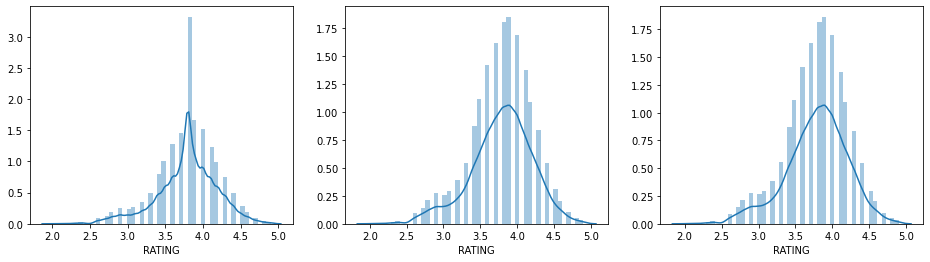

In [649]:
fig = fig_of_size(16,4)
    
fig.add_subplot(131)
sns.distplot(MeanMedianImputer(variables=['RATING']).fit_transform(df_cleaned).RATING)
fig.add_subplot(132)
sns.distplot(df_cleaned.RATING)
fig.add_subplot(133)
sns.distplot(RandomSampleImputer(variables=['RATING']).fit_transform(df_cleaned).RATING)

* Random Sample Works better.

In [651]:
df_cleaned = RandomSampleImputer(variables=['RATING']).fit_transform(df_cleaned)

In [583]:
## Dropping the redundant columns.

In [590]:
df_cleaned.drop(['RESTAURANT_ID','CUISINES','TIME','LOCALITY','CLOSED'],1,inplace=True)

In [652]:
df_cleaned

,TITLE,CITY,RATING,VOTES,COST,n_indian_cuisine,s_indian_cuisine,chinese_cuisine,bakery_desserts_cuisine,fast_food_cuisine,...,beverage_cuisine,non_indian_cuisine,fri,mon,never_closed,sat,sun,thu,tue,wed
0,CASUAL DINING,Thane,3.6,49.0,1200.0,1,0,0,0,0,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
0,CASUAL DINING,Noida,4.3,49.0,NaN,1,0,1,0,0,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,CASUAL DINING,Chennai,4.2,30.0,1500.0,0,0,0,0,0,...,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,QUICK BITES,Mumbai,4.2,30.0,NaN,1,1,0,0,1,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,CASUAL DINING,Chennai,3.8,22.0,800.0,1,0,1,0,0,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,Hyderabad,3.8,54.0,500.0,1,0,0,0,1,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12686,CASUAL DINING,Mumbai,4.3,12.0,1800.0,0,0,0,0,0,...,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12687,LOUNGE_CLUB_MICROBREWERY,Mumbai,4.0,60.0,1300.0,0,0,1,0,1,...,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12688,CASUAL DINING,Chennai,3.5,32.0,400.0,1,1,1,0,1,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [653]:
## Addressing the missing values

In [654]:
df_cleaned.isna().sum()

TITLE                      1287
CITY                        147
RATING                        0
VOTES                      2795
COST                       4231
n_indian_cuisine              0
s_indian_cuisine              0
chinese_cuisine               0
bakery_desserts_cuisine       0
fast_food_cuisine             0
regional_cuisine              0
beverage_cuisine              0
non_indian_cuisine            0
fri                           0
mon                           0
never_closed                  0
sat                           0
sun                           0
thu                           0
tue                           0
wed                           0
dtype: int64

In [655]:
df_cleaned.isna().mean()

TITLE                      0.076064
CITY                       0.008688
RATING                     0.000000
VOTES                      0.165189
COST                       0.250059
n_indian_cuisine           0.000000
s_indian_cuisine           0.000000
chinese_cuisine            0.000000
bakery_desserts_cuisine    0.000000
fast_food_cuisine          0.000000
regional_cuisine           0.000000
beverage_cuisine           0.000000
non_indian_cuisine         0.000000
fri                        0.000000
mon                        0.000000
never_closed               0.000000
sat                        0.000000
sun                        0.000000
thu                        0.000000
tue                        0.000000
wed                        0.000000
dtype: float64

In [604]:
# segregating the categorical and numerical values in different lists

In [599]:
from feature_engine.missing_data_imputers import _find_categorical_variables,_find_numerical_variables

In [639]:
cat_var = _find_categorical_variables(df_cleaned)
num_var = _find_numerical_variables(df_cleaned)

In [640]:
num_var

['RATING',
 'VOTES',
 'COST',
 'fri',
 'mon',
 'never_closed',
 'sat',
 'sun',
 'thu',
 'tue',
 'wed']

In [641]:
cat_var

['TITLE',
 'CITY',
 'n_indian_cuisine',
 's_indian_cuisine',
 'chinese_cuisine',
 'bakery_desserts_cuisine',
 'fast_food_cuisine',
 'regional_cuisine',
 'beverage_cuisine',
 'non_indian_cuisine']

In [657]:
from feature_engine.missing_data_imputers import CategoricalVariableImputer

In [658]:
## categorical imputations :

In [668]:
cat_missing = ['TITLE','CITY']
enc = CategoricalVariableImputer(fill_value='frequent',variables=cat_missing)
df_cleaned = enc.fit_transform(df_cleaned)

In [663]:
## numrical imputations

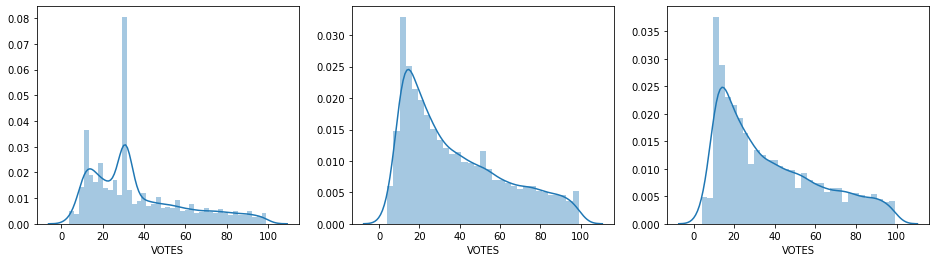

In [664]:
fig = fig_of_size(16,4)
    
fig.add_subplot(131)
sns.distplot(MeanMedianImputer(variables=['VOTES']).fit_transform(df_cleaned).VOTES)
fig.add_subplot(132)
sns.distplot(df_cleaned.VOTES)
fig.add_subplot(133)
sns.distplot(RandomSampleImputer(variables=['VOTES']).fit_transform(df_cleaned).VOTES)

In [665]:
df_cleaned = RandomSampleImputer(variables=['VOTES']).fit_transform(df_cleaned)

In [676]:
df_cleaned.isna().sum()

TITLE                         0
CITY                          0
RATING                        0
VOTES                         0
COST                       4231
n_indian_cuisine              0
s_indian_cuisine              0
chinese_cuisine               0
bakery_desserts_cuisine       0
fast_food_cuisine             0
regional_cuisine              0
beverage_cuisine              0
non_indian_cuisine            0
fri                           0
mon                           0
never_closed                  0
sat                           0
sun                           0
thu                           0
tue                           0
wed                           0
dtype: int64

In [677]:
## One Hot encoding

In [678]:
from feature_engine.categorical_encoders import OneHotCategoricalEncoder

In [679]:
onehot = OneHotCategoricalEncoder(drop_last=True,variables=cat_var)

In [681]:
df_cleaned = onehot.fit_transform(df_cleaned)

In [682]:
df_cleaned.head()

,RATING,VOTES,COST,fri,mon,never_closed,sat,sun,thu,tue,...,CITY_New Delhi,CITY_Ghaziabad,n_indian_cuisine_1,s_indian_cuisine_0,chinese_cuisine_0,bakery_desserts_cuisine_0,fast_food_cuisine_0,regional_cuisine_1,beverage_cuisine_0,non_indian_cuisine_0
0,3.6,49.0,1200.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,1,1,1,1,1,1,1,1
0,4.3,49.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,1,1,0,1,1,0,1,1
1,4.2,30.0,1500.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,1,1,1,1,0,1,0
1,4.2,30.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,1,0,1,1,0,0,1,1
2,3.8,22.0,800.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,1,1,0,1,1,1,1,1


## Train test split

In [686]:
df_train = df_cleaned[~df_cleaned.COST.isna()].copy()
df_test = df_cleaned[df_cleaned.COST.isna()].copy()

In [691]:
df_train.head()

,RATING,VOTES,COST,fri,mon,never_closed,sat,sun,thu,tue,...,CITY_New Delhi,CITY_Ghaziabad,n_indian_cuisine_1,s_indian_cuisine_0,chinese_cuisine_0,bakery_desserts_cuisine_0,fast_food_cuisine_0,regional_cuisine_1,beverage_cuisine_0,non_indian_cuisine_0
0,3.6,49.0,1200.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,1,1,1,1,1,1,1,1
1,4.2,30.0,1500.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,1,1,1,1,0,1,0
2,3.8,22.0,800.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,1,1,0,1,1,1,1,1
3,4.1,24.0,800.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,1,1,0,1,1
4,3.8,16.0,300.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,1,1,0,1,0,1,1


In [692]:
len(df_train)

12689

In [688]:
df_test.head()

,RATING,VOTES,COST,fri,mon,never_closed,sat,sun,thu,tue,...,CITY_New Delhi,CITY_Ghaziabad,n_indian_cuisine_1,s_indian_cuisine_0,chinese_cuisine_0,bakery_desserts_cuisine_0,fast_food_cuisine_0,regional_cuisine_1,beverage_cuisine_0,non_indian_cuisine_0
0,4.3,49.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,1,1,0,1,1,0,1,1
1,4.2,30.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,1,0,1,1,0,0,1,1
2,3.8,22.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,1,1,0,1,1,0,1,0
3,3.8,24.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,1,1,1,1,1,1,1
4,3.6,16.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,1,1,1,1,1


In [689]:
df_test.drop('COST',1,inplace=True)

In [696]:
df_test.head()

,RATING,VOTES,fri,mon,never_closed,sat,sun,thu,tue,wed,...,CITY_New Delhi,CITY_Ghaziabad,n_indian_cuisine_1,s_indian_cuisine_0,chinese_cuisine_0,bakery_desserts_cuisine_0,fast_food_cuisine_0,regional_cuisine_1,beverage_cuisine_0,non_indian_cuisine_0
0,4.3,49.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,1,0,1,1,0,1,1
1,4.2,30.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,1,1,0,0,1,1
2,3.8,22.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,1,0,1,1,0,1,0
3,3.8,24.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,1,1,1,1,1,1
4,3.6,16.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,1,1,1,1,1


## X and y split

In [698]:
X = df_train.drop('COST',1)
y = df_train['COST']

## Train Validation Split

In [700]:
from sklearn.model_selection import train_test_split

In [702]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.3,random_state=42)

* check the shape

In [703]:
X_train.shape,y_train.shape,X_val.shape,y_val.shape

((8882, 39), (8882,), (3807, 39), (3807,))

## Building the model.

In [720]:
# import training dependencies
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import  KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor

In [705]:
# import the evaluation metrics dependenices
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_squared_error

In [709]:
# helper function
def train_n_ret_scores(model):
    model.fit(X_train,y_train)
    
    y_preds = model.predict(X_val)
    print('MSE:',mean_squared_error(y_val,y_preds))
    print('R2_Score',r2_score(y_val,y_preds))  

In [712]:
# try1: Linear Regression
train_n_ret_scores(LinearRegression())

MSE: 227915.268622239
R2_Score 0.42278669113674394


In [713]:
# try2: Ridge Regression
train_n_ret_scores(Ridge())

MSE: 227864.34369664223
R2_Score 0.42291566250836377


In [714]:
# try3: Lasso Regression
train_n_ret_scores(Lasso(alpha=0.00003))

MSE: 227914.85597639647
R2_Score 0.4227877361947323


In [715]:
# ElasticNet
train_n_ret_scores(ElasticNet(alpha=0.0001))

MSE: 227858.6079828621
R2_Score 0.42293018865375864


In [717]:
# try4: SVR
train_n_ret_scores(SVR(kernel='linear'))

MSE: 285554.30434549693
R2_Score 0.2768113085718622


In [718]:
# try5: Decision Trees
train_n_ret_scores(DecisionTreeRegressor(criterion='mse'))

MSE: 376497.3099261594
R2_Score 0.04649100802109141


In [719]:
# try6: Random Forest
train_n_ret_scores(RandomForestRegressor())

MSE: 230795.51826498174
R2_Score 0.41549223282032766


In [721]:
# try7: Gradient Boosting
train_n_ret_scores(GradientBoostingRegressor())

MSE: 200583.25004487453
R2_Score 0.4920071737148609


In [722]:
# try9: Adaboost with DC

train_n_ret_scores(AdaBoostRegressor(base_estimator=DecisionTreeRegressor()))

MSE: 232918.0639480073
R2_Score 0.41011671926075444


In [723]:
# try8: Adaboost

train_n_ret_scores(AdaBoostRegressor())

MSE: 345918.5613441954
R2_Score 0.12393408920029936


In [724]:
# try 3 : KNN
train_n_ret_scores(KNeighborsRegressor())

MSE: 272724.31236143946
R2_Score 0.3093042704105946


In [725]:
#let's create the models dataframe
models = [LinearRegression(),Ridge(alpha=0.001),Lasso(alpha=0.0003),ElasticNet(alpha=0.0001),SVR(),DecisionTreeRegressor(),RandomForestRegressor(),GradientBoostingRegressor(),AdaBoostRegressor(base_estimator=LinearRegression())]
model_names = 'Linear Ridge Lasso ElasticNet SVR Descision_Tree Random_Forest Gradient_Boost Ada_Boost'.split()
models_df = pd.DataFrame(columns=['Model','MSE','R2','meanCV'])
for model,model_names in zip(models,model_names):
    print(model)
    
    model.fit(X_train,y_train)
    
    y_preds = model.predict(X_val)
    
    mse = mean_squared_error(y_val,y_preds)
    r2 = r2_score(y_val,y_preds)
    avgCV = np.mean(cross_val_score(model,X,y,scoring='r2'))
    
    
    models_df = models_df.append({'Model':model_names,'MSE':mse,'R2':r2,'meanCV':avgCV},ignore_index=True)


LinearRegression()
Ridge(alpha=0.001)
Lasso(alpha=0.0003)
ElasticNet(alpha=0.0001)
SVR()
DecisionTreeRegressor()
RandomForestRegressor()
GradientBoostingRegressor()
AdaBoostRegressor(base_estimator=LinearRegression())


In [726]:
models_df

,Model,MSE,R2,meanCV
0,Linear,227915.268622,0.422787,0.435498
1,Ridge,227914.905006,0.422788,0.435499
2,Lasso,227911.738534,0.422796,0.435508
3,ElasticNet,227858.607983,0.422930,0.435616
4,SVR,416598.985203,-0.055070,-0.078242
5,Descision_Tree,381415.170096,0.034036,-0.044284
6,Random_Forest,229985.142054,0.417545,0.413598
7,Gradient_Boost,200593.804789,0.491980,0.501869
8,Ada_Boost,284865.625134,0.278555,-1.542995


* Choosing Gradient Boosting as the best model.

In [727]:
best_model = GradientBoostingRegressor()

In [728]:
best_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [730]:
best_model.score(X_val,y_val)

0.49198372421720604

## Testing on the Test set.

In [732]:
test_prediction = best_model.predict(df_test)

In [733]:
test_prediction

array([1403.87326964,  290.08346387,  928.06214878, ...,  456.98586479,
        300.59525699,  334.7633621 ])

In [738]:
best_model.score(df_test,test_prediction)

1.0

In [736]:
X_train.shape

(8882, 39)

In [737]:
df_test.shape

(4231, 39)

* Saving the results to a CSV file

In [740]:
pd.DataFrame(test_prediction).to_csv('Train_results.csv')

In [741]:
## Saving the model

In [742]:
import joblib
joblib.dump(best_model,'Restaurant_Food_Price.pkl')

['Restaurant_Food_Price.pkl']